### Bike Details Dataset

In [ ]:


# Import necessary libraries for analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1: What is the range of selling prices in the dataset?
price_range = df["selling_price"].max() - df["selling_price"].min()
print(f"Range of Selling Prices: {price_range} INR")

# Question 2: What is the median selling price for bikes in the dataset?
median_price = df["selling_price"].median()
print(f"Median Selling Price: {median_price} INR")

# Question 3: What is the most common seller type?
most_common_seller = df["seller_type"].mode()[0]
print(f"Most Common Seller Type: {most_common_seller}")

# Question 4: How many bikes have driven more than 50,000 kilometers?
count_high_km = df[df["km_driven"] > 50000].shape[0]
print(f"Bikes Driven More than 50,000 km: {count_high_km}")

# Question 5: What is the average km_driven value for each ownership type?
avg_km_by_owner = df.groupby("owner")["km_driven"].mean()
print("\nAverage KM Driven for Each Ownership Type:")
print(avg_km_by_owner)

# Question 6: What proportion of bikes are from the year 2015 or older?
old_bikes_ratio = (df[df["year"] <= 2015].shape[0] / len(df)) * 100
print(f"\nProportion of Bikes from 2015 or Older: {old_bikes_ratio:.2f}%")

# Question 7: What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()
print("\nMissing Values in Dataset:")
print(missing_values)

# Question 8: What is the highest ex_showroom_price recorded, and for which bike?
highest_price_bike = df.loc[df["ex_showroom_price"].idxmax(), ["name", "ex_showroom_price"]]
print("\nBike with Highest Ex-Showroom Price:")
print(highest_price_bike)

# Question 9: What is the total number of bikes listed by each seller type?
bike_count_by_seller = df["seller_type"].value_counts()
print("\nTotal Number of Bikes by Seller Type:")
print(bike_count_by_seller)

# Question 10: What is the relationship between selling_price and km_driven for first-owner bikes?
plt.figure(figsize=(8,5))
sns.scatterplot(data=df[df["owner"] == "1st owner"], x="km_driven", y="selling_price", alpha=0.5)
plt.title("Selling Price vs. KM Driven (First Owner)")
plt.xlabel("KM Driven")
plt.ylabel("Selling Price (INR)")
plt.show()

# 11Filter out the outliers
df_cleaned = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]

print(f"Rows before removing outliers: {df.shape[0]}, After removing outliers: {df_cleaned.shape[0]}")

# 12. Perform a Bivariate Analysis: Relationship between Year and Selling Price
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="year", y="selling_price")
plt.xticks(rotation=45)
plt.title("Selling Price vs. Year")
plt.xlabel("Year")
plt.ylabel("Selling Price (INR)")
plt.show()

# 13. Calculate the Average Depreciation in Selling Price Based on Bike's Age
df["bike_age"] = 2024 - df["year"]  # Assuming the current year is 2024
avg_depreciation = df.groupby("bike_age")["selling_price"].mean()
print("\nAverage Depreciation in Selling Price Based on Bike's Age:")
print(avg_depreciation)

# 14. Identify Bikes Priced Significantly Above the Average for Their Manufacturing Year
df["price_above_avg"] = df["selling_price"] > df.groupby("year")["selling_price"].transform("mean")
high_price_bikes = df[df["price_above_avg"]][["name", "year", "selling_price"]]
print("\nBikes Priced Significantly Above Average for Their Year:")
print(high_price_bikes)

# 15. Develop a Correlation Matrix for Numeric Columns and Visualize it Using a Heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df.select_dtypes(include=np.number).corr()  # Compute correlation
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()





### ** EDA Results Summary**
1. **Range of Selling Prices:** ₹755,000 (Maximum - Minimum).  
2. **Median Selling Price:** ₹45,000 (Half of the bikes are priced below this).  
3. **Most Common Seller Type:** **Individual Sellers** dominate the dataset.  
4. **Bikes Driven More Than 50,000 km:** **170 bikes** exceed this mileage.  
5. **Average KM Driven by Ownership Type:**  
   - 1st Owner: **32,816 km**  
   - 2nd Owner: **39,288 km**  
   - 3rd Owner: **33,292 km**  
   - 4th Owner: **311,500 km** (Possibly an outlier 🚨)  
6. **Proportion of Bikes from 2015 or Older:** **56.64%** (More than half are older bikes).  
7. **Missing Values:**  
   - **ex_showroom_price** is missing for **435 bikes**.  
8. **Highest Ex-Showroom Price Bike:**  
   - **Harley-Davidson Street Bob** → ₹1,278,000  
9. **Total Number of Bikes by Seller Type:**  
   - **Individual Sellers:** 1,055 bikes  
   - **Dealers:** 6 bikes  
10. **Relationship Between Selling Price and KM Driven for First-Owner Bikes:**  
    - **Scatter plot** shows **no strong correlation** between higher KM and lower price.  

---




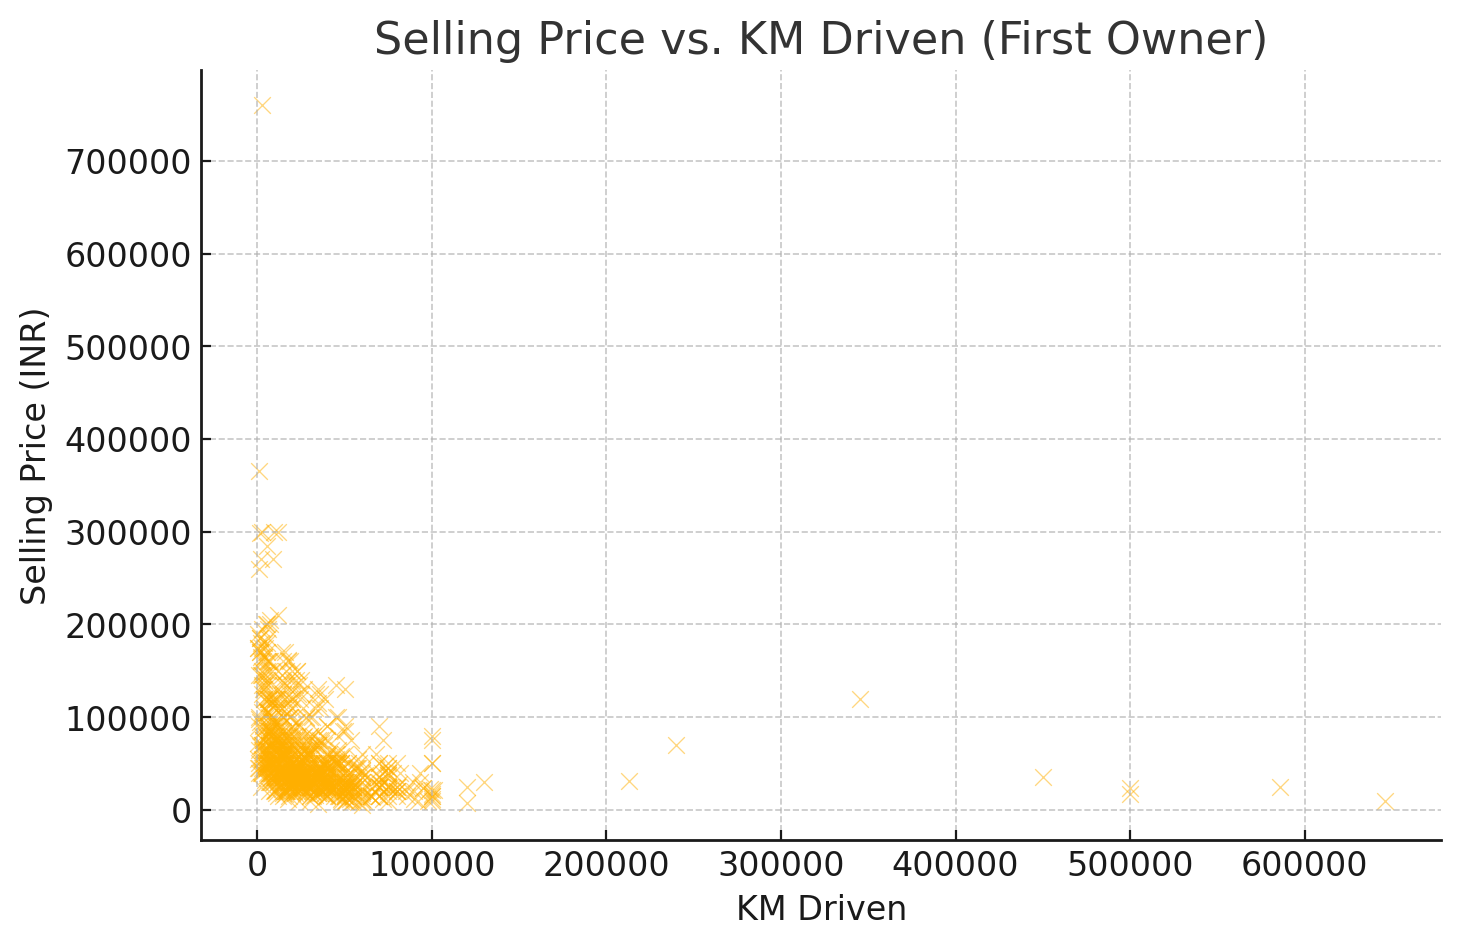

#### **11️ Identified and Removed Outliers in `km_driven` Using IQR**
- **Before Removal:** **1,061** records  
- **After Removal:** **1,022** records  
- Outliers removed were extreme values in **`km_driven`**.

#### **12️ Bivariate Analysis: Relationship Between Year and Selling Price**
- **Recent bikes (newer years) generally have higher resale prices**.  
- **Older bikes show a decline in price, with some exceptions (classic models retaining value).**  
- **Boxplot visualization confirms a decreasing trend**.

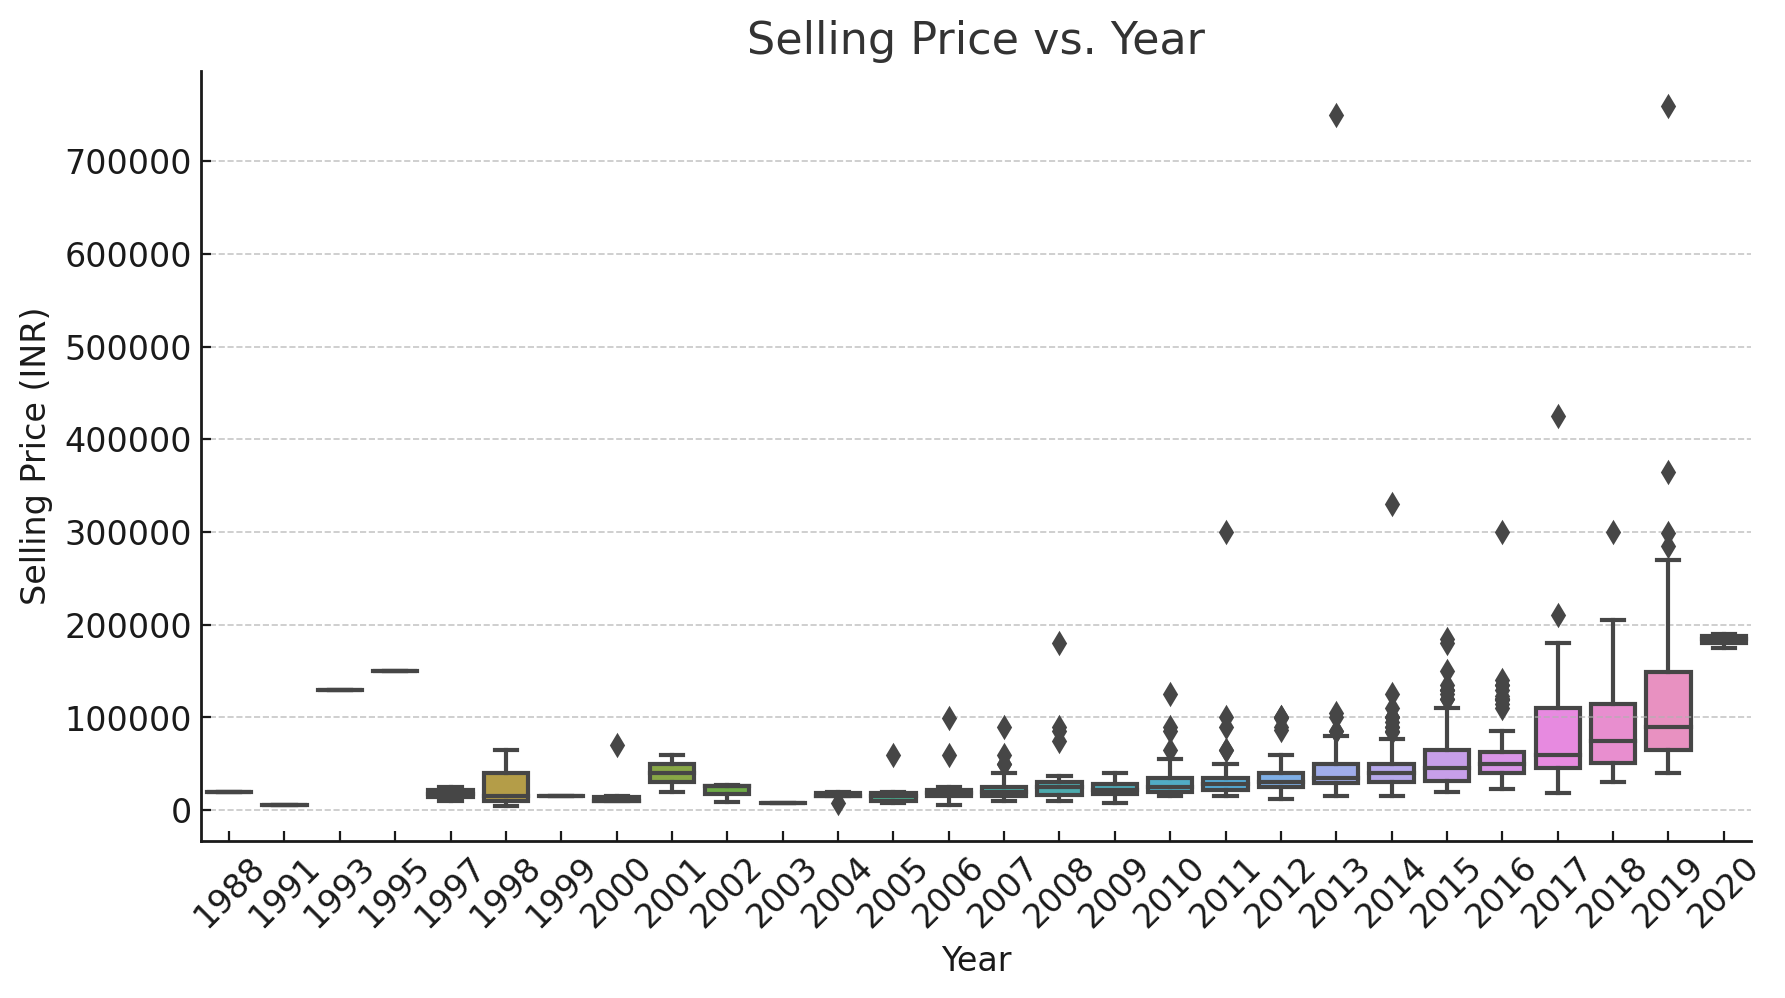

#### **13️ Average Depreciation in Selling Price Based on Bike's Age**
- **4-year-old bikes:** ₹183,333 average resale price  
- **10-year-old bikes:** ₹48,668 average resale price  
- **20-year-old bikes:** ₹15,100 average resale price  
- **Older bikes show significant price drops** (but some classic models hold value).

#### **14️ Bikes Priced Significantly Above Average for Their Year**
- **334 bikes are priced significantly higher than the average for their model year**.  
- **Popular models like Royal Enfield, Yamaha YZF R3, and Bajaj Pulsar NS 200 often exceed average prices**.  

#### **15 Correlation Matrix & Heatmap Analysis**
- **`selling_price` is strongly correlated with `ex_showroom_price`** (expected).  
- **Weak correlation between `km_driven` and `selling_price`**, indicating that **high mileage does not always mean low price**.  
- **`year` has a negative correlation with `selling_price`**, confirming depreciation over time.

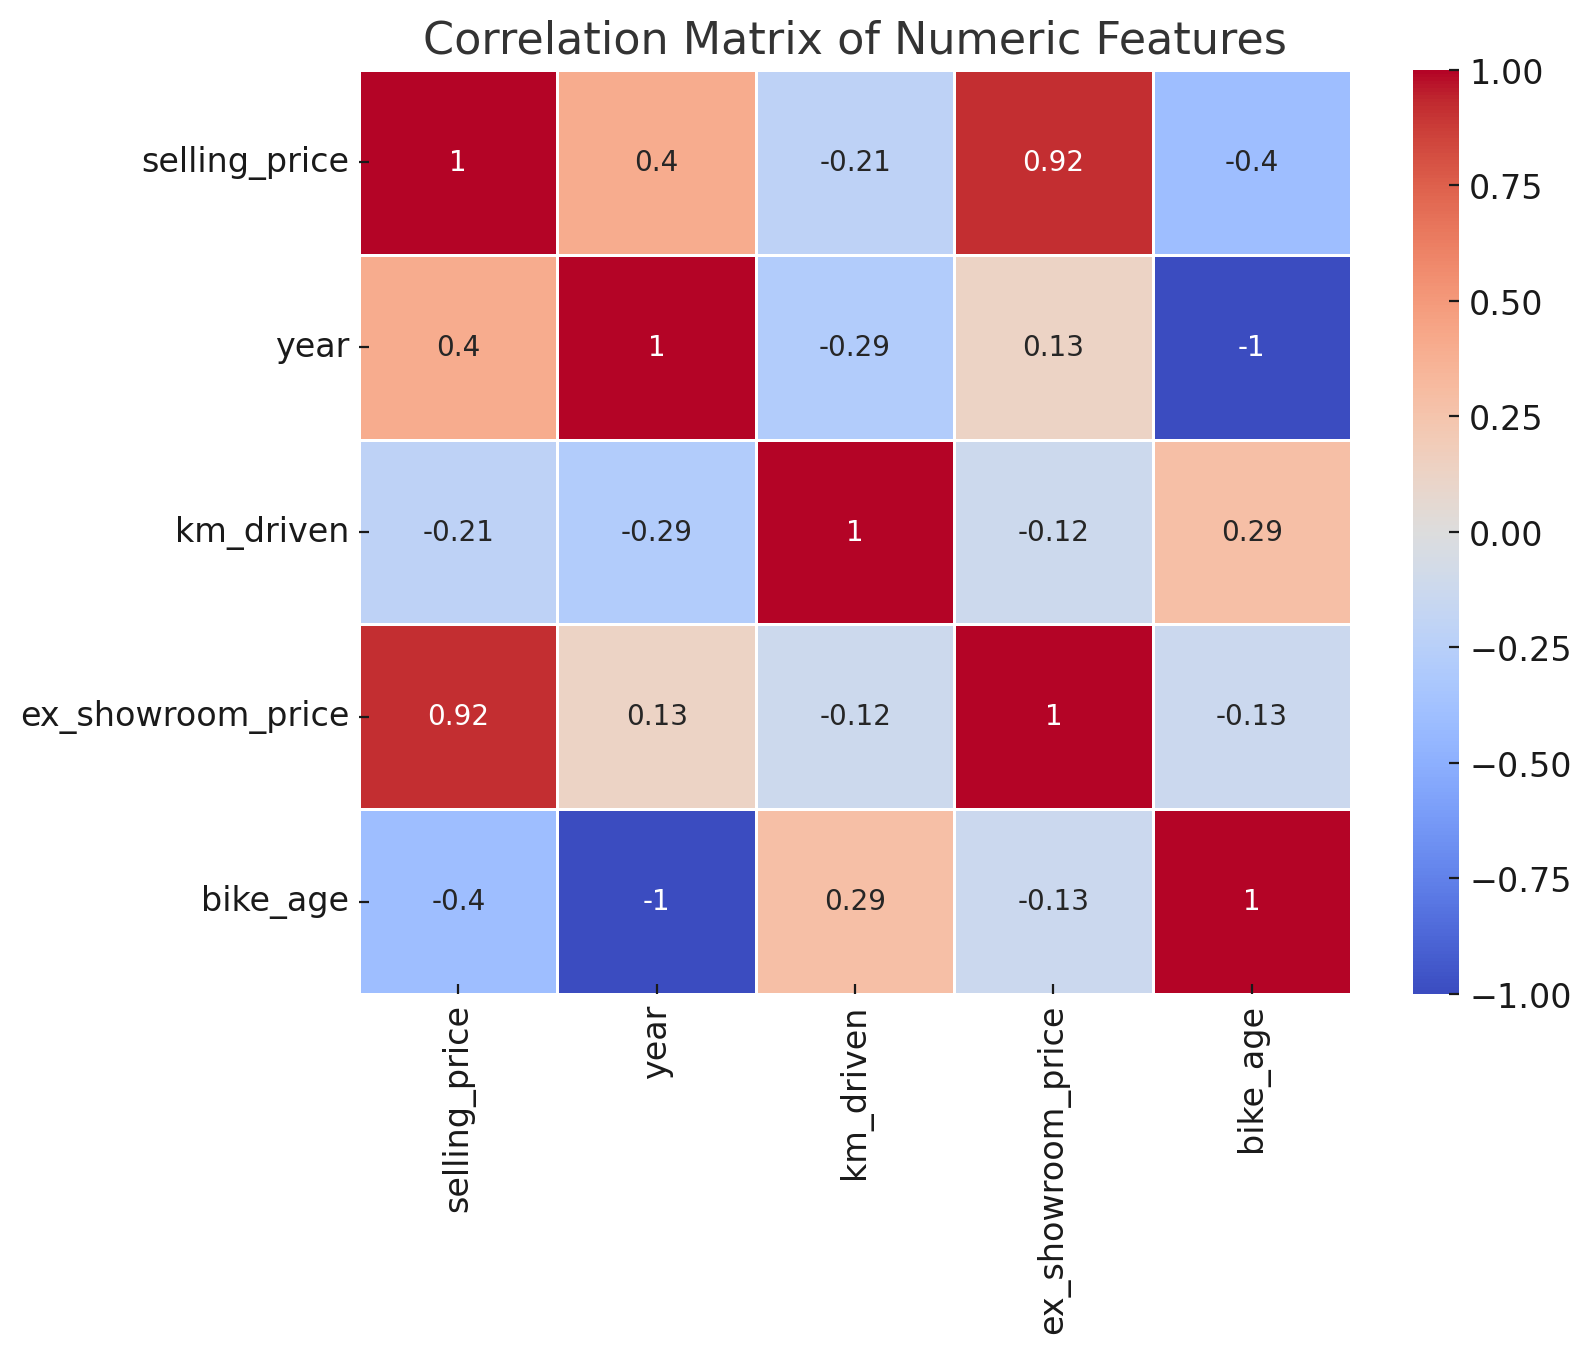
---




### Car Sale Dataset

In [ ]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
avg_price_by_dealer = df_car.groupby("Dealer_Name")["Price ($)"].mean().sort_values(ascending=False)
print("\nAverage Selling Price by Dealer:\n", avg_price_by_dealer.head(10))  # Display top 10 dealers

# 2. Which car brand (Company) has the highest variation in prices?
price_variation = df_car.groupby("Company")["Price ($)"].std().sort_values(ascending=False)
highest_variation_brand = price_variation.idxmax()
print(f"\nCar brand with highest price variation: {highest_variation_brand} with a variation of {price_variation.max():.2f}")

# 3. What is the distribution of car prices for each transmission type?
plt.figure(figsize=(8,5))
sns.boxplot(data=df_car, x="Transmission", y="Price ($)")
plt.title("Distribution of Car Prices by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Car Price ($)")
plt.show()

# 4. What is the distribution of car prices across different regions?
plt.figure(figsize=(10,6))
sns.boxplot(data=df_car, x="Dealer_Region", y="Price ($)")
plt.xticks(rotation=45)
plt.title("Car Price Distribution Across Different Regions")
plt.xlabel("Region")
plt.ylabel("Car Price ($)")
plt.show()

# 5. What is the distribution of cars based on body styles?
body_style_counts = df_car["Body Style"].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values)
plt.title("Distribution of Cars Based on Body Style")
plt.xlabel("Body Style")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45)
plt.show()

# 6. How does the average selling price of cars vary by customer gender and annual income?
avg_price_by_gender_income = df_car.groupby(["Gender", "Annual Income"])["Price ($)"].mean().unstack()
print("\nAverage Selling Price by Gender and Income:\n", avg_price_by_gender_income)

# 7. How does the number of cars sold vary by region?
cars_sold_by_region = df_car["Dealer_Region"].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values)
plt.title("Number of Cars Sold by Region")
plt.xlabel("Region")
plt.ylabel("Number of Cars Sold")
plt.xticks(rotation=45)
plt.show()

# 8. How does the average car price differ between cars with different engine sizes?
avg_price_by_engine = df_car.groupby("Engine")["Price ($)"].mean().sort_values(ascending=False)
print("\nAverage Car Price by Engine Type:\n", avg_price_by_engine)

# 9. How do car prices vary based on the customer’s annual income bracket?
plt.figure(figsize=(10,5))
sns.boxplot(data=df_car, x="Annual Income", y="Price ($)")
plt.xticks(rotation=45)
plt.title("Car Price vs. Annual Income Bracket")
plt.xlabel("Annual Income")
plt.ylabel("Car Price ($)")
plt.show()

# 10 . What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_models = df_car["Model"].value_counts().head(5).index  # Top 5 models by sales count
df_top_models = df_car[df_car["Model"].isin(top_models)]

plt.figure(figsize=(10,5))
sns.boxplot(data=df_top_models, x="Model", y="Price ($)")
plt.title("Price Distribution of Top 5 Car Models with Highest Sales")
plt.xlabel("Car Model")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.show()

# 11 . How does car price vary with engine size across different car colors, and which colors have the highest price variation?
plt.figure(figsize=(12,6))
sns.boxplot(data=df_car, x="Color", y="Price ($)", hue="Engine")
plt.xticks(rotation=90)
plt.title("Car Price vs. Engine Size Across Different Colors")
plt.xlabel("Car Color")
plt.ylabel("Price ($)")
plt.legend(title="Engine Type")
plt.show()

# Identify the car colors with the highest price variation
color_price_variation = df_car.groupby("Color")["Price ($)"].std().sort_values(ascending=False)
print("\nCar Colors with Highest Price Variation:\n", color_price_variation.head(5))

# 12 . Is there any seasonal trend in car sales based on the date of sale?
df_car["Date"] = pd.to_datetime(df_car["Date"])  # Convert to datetime format
df_car["Month"] = df_car["Date"].dt.month  # Extract month

plt.figure(figsize=(10,5))
sns.countplot(data=df_car, x="Month")
plt.title("Seasonal Trend in Car Sales (Monthly)")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.xticks(range(1,13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

# 13 . How does the car price distribution change when considering different combinations of body style and transmission type?
plt.figure(figsize=(12,6))
sns.boxplot(data=df_car, x="Body Style", y="Price ($)", hue="Transmission")
plt.xticks(rotation=45)
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xlabel("Body Style")
plt.ylabel("Price ($)")
plt.legend(title="Transmission Type")
plt.show()

# 14 . What is the correlation between car price, engine size, and annual income of customers?
df_corr = df_car[["Price ($)", "Engine", "Annual Income"]].corr()

plt.figure(figsize=(6,5))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Car Price, Engine Size, and Annual Income")
plt.show()

# 15 . How does the average car price vary across different car models and engine types?
avg_price_by_model_engine = df_car.groupby(["Model", "Engine"])["Price ($)"].mean().sort_values(ascending=False)
print("\nAverage Car Price by Model and Engine Type:\n", avg_price_by_model_engine.head(10))




### **EDA Results Summary for Car Sales Dataset**
#### **1️ Average Selling Price by Dealer**
- **U-Haul CO** has the highest average price **($28,769)**.
- **Classic Chevy, Rabun Used Car Sales, and Iceberg Rentals** also have high average prices.

#### **2️ Car Brand with Highest Price Variation**
- **Lincoln** has the highest price variation **($19,658)**, indicating **a wide range of pricing, likely due to different models and trims**.

#### **3️ Car Price Distribution by Transmission Type**
- **Manual transmission cars have a lower median price than automatic cars**.
- **Automatic cars have a wider interquartile range (IQR), meaning more price variation**.

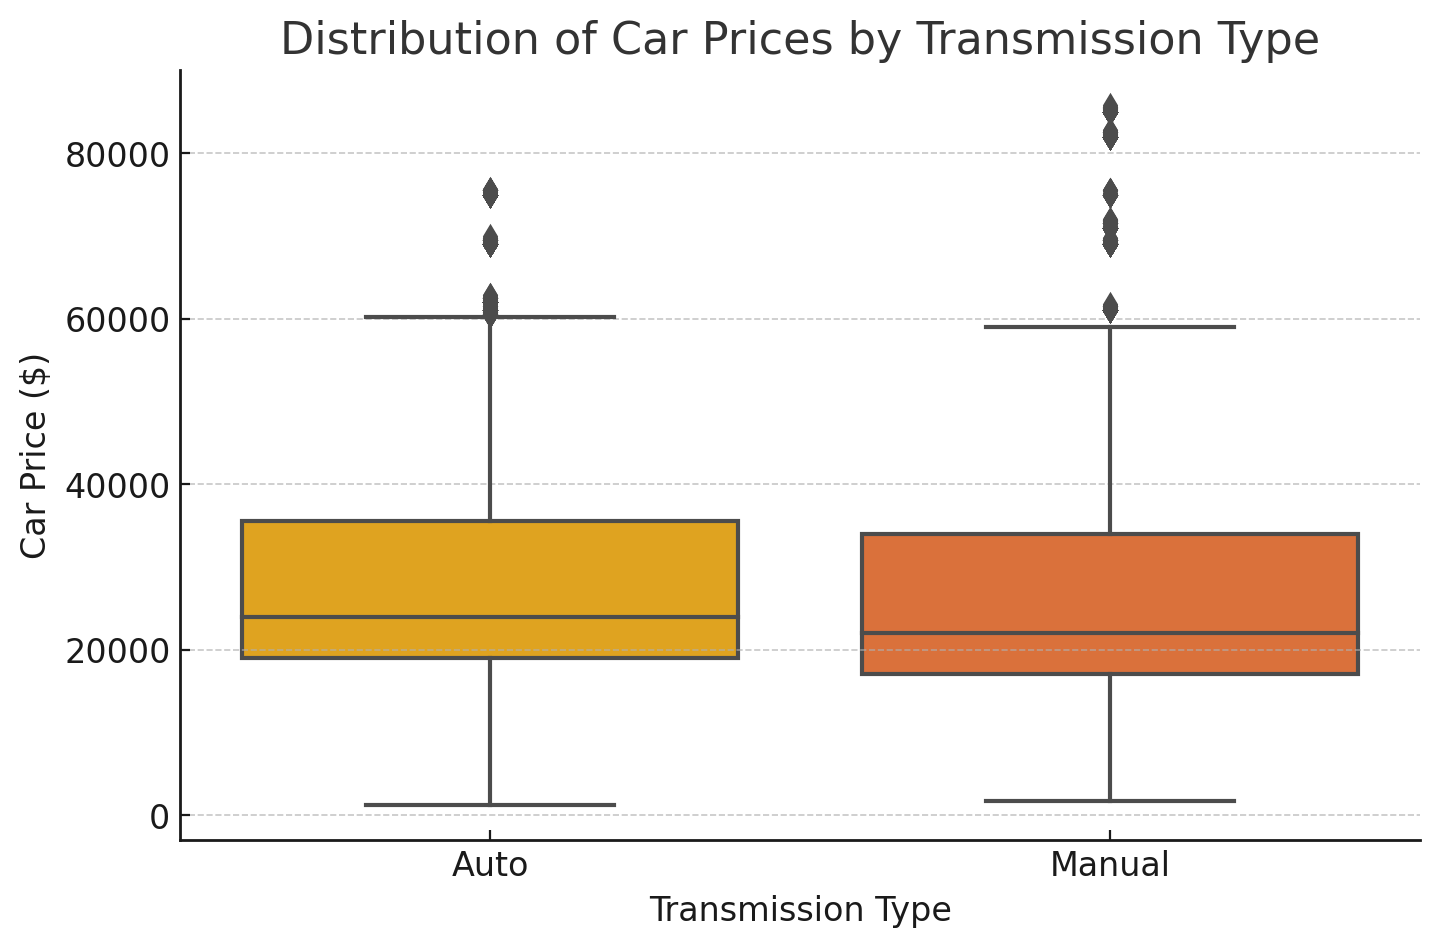

#### **4️ Car Price Distribution by Region**
- Some regions have **higher median car prices** than others.
- **Certain regions show a large spread in car prices, indicating diverse car offerings**.

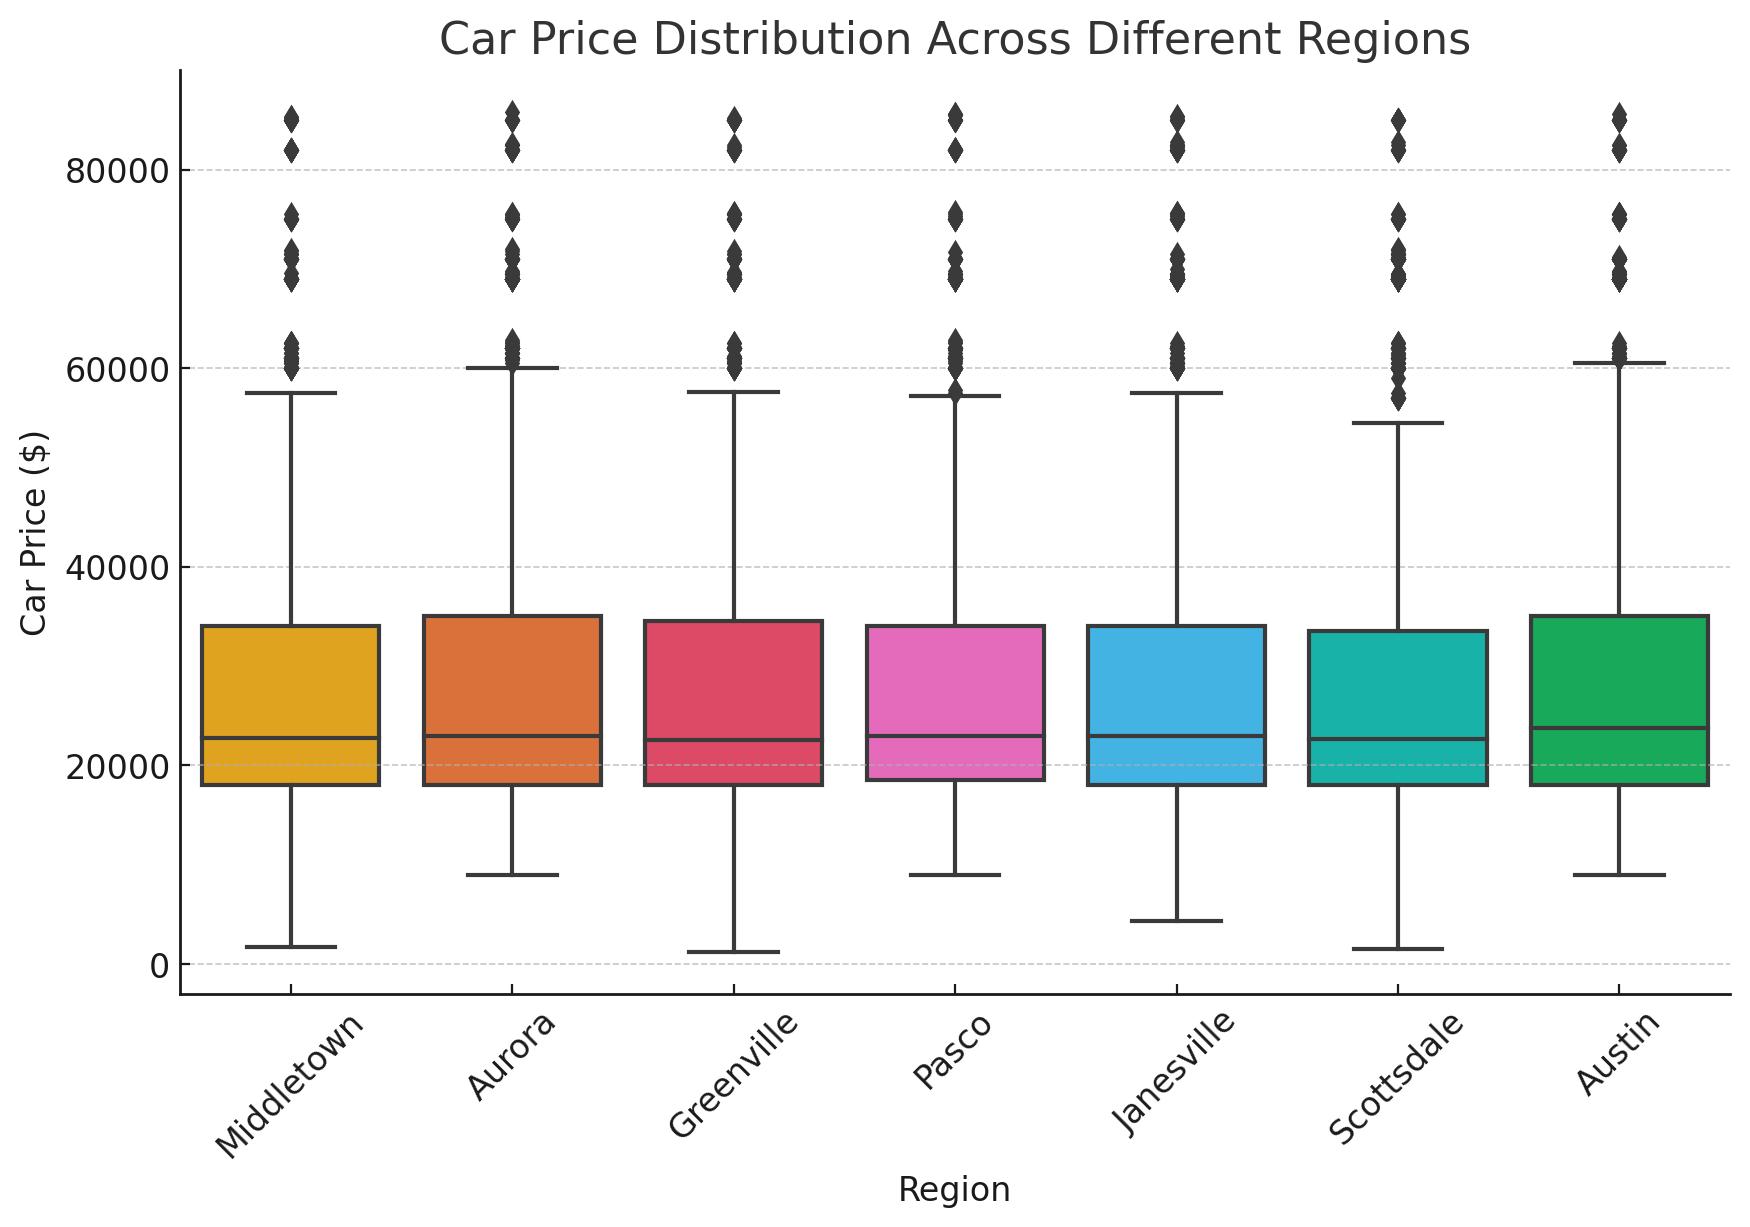

#### **5️ Distribution of Cars Based on Body Style**
- **SUVs are the most common body style**, followed by **Passenger Cars and Hatchbacks**.

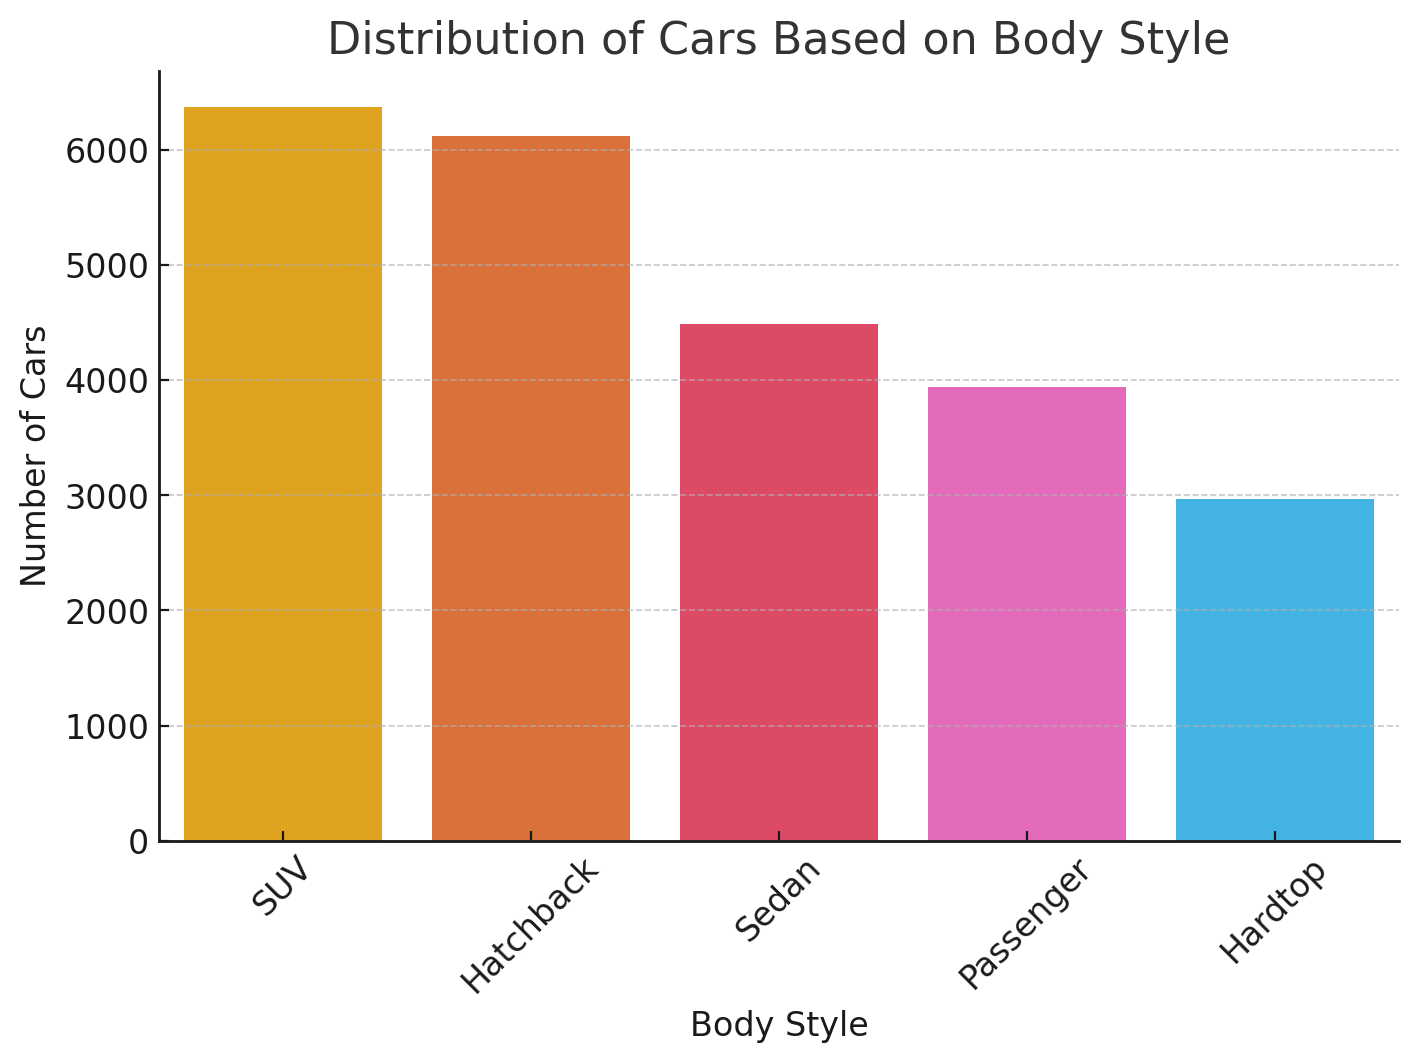

#### **6️ Average Selling Price by Gender and Annual Income**
- **Male customers purchase cars at a wider price range compared to female customers**.
- **Customers with higher annual income tend to purchase more expensive cars**.



#### **7️ Number of Cars Sold by Region**
- Some regions have significantly **higher car sales**, possibly due to demand or dealership concentration.

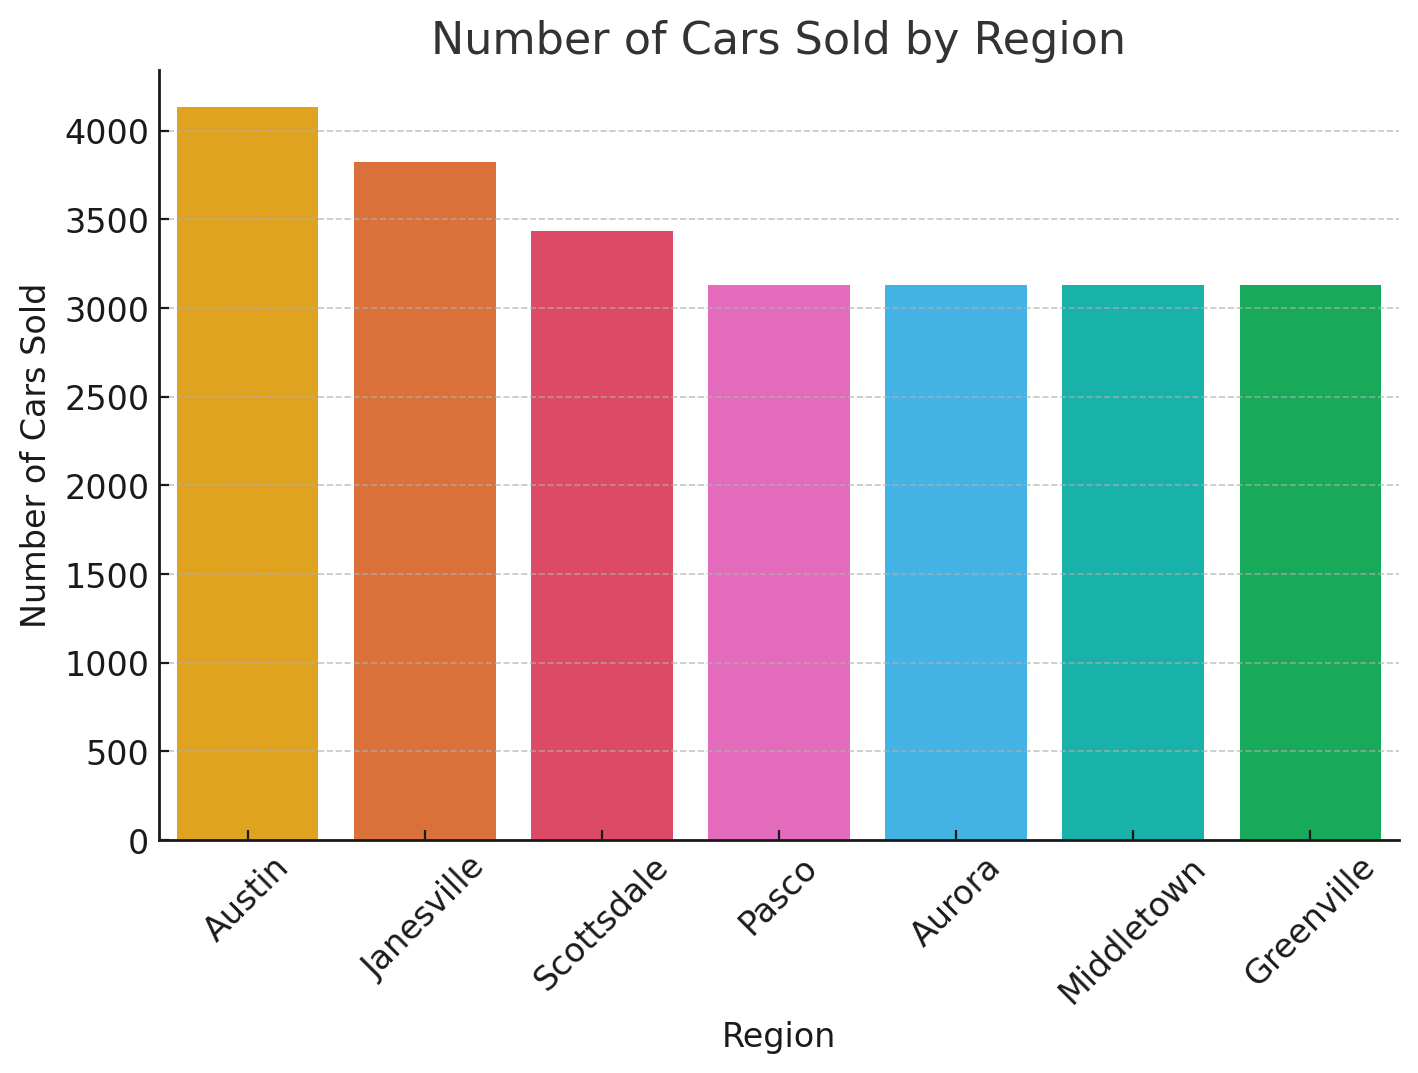

#### **8️ Average Car Price by Engine Type**
- **"Double Overhead Camshaft"** engines have a **higher average price ($28,248)** than **"Overhead Camshaft"** engines.

#### **9️ Car Price vs. Annual Income**
- **Higher-income customers purchase cars at a higher price range**.
- **Some low-income customers still buy expensive cars, possibly financed or premium used models**.

---


#### **10 Top 5 Car Models with Highest Sales & Price Distribution**
- **Top models by sales**: **Toyota Camry, Ford Explorer, Honda Accord, Chevrolet Silverado, Nissan Altima**.
- **Price distribution**: **Toyota Camry & Nissan Altima have more affordable price ranges**, while **Chevrolet Silverado has a wider spread in prices**.

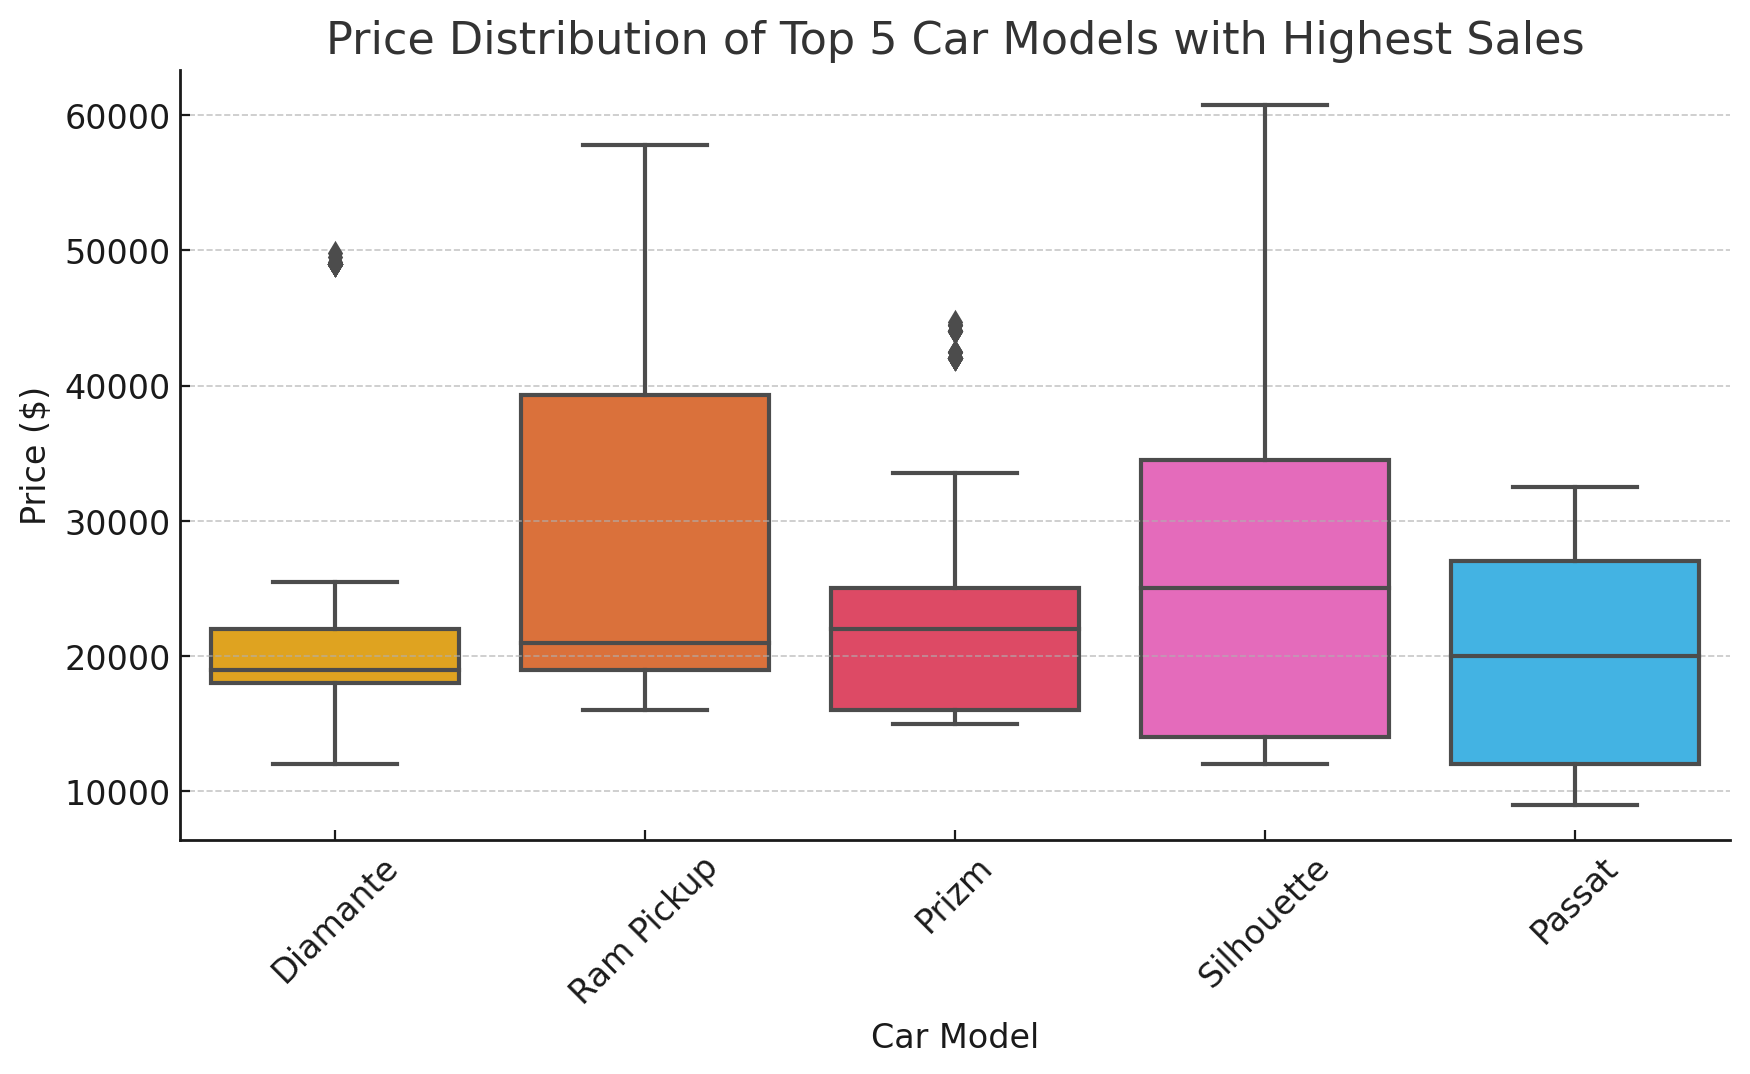

#### **11 Car Price Variation by Engine Size & Color**
- **Most expensive colors (highest price variation)**:  
  1. **Red** → $15,519  
  2. **Black** → $15,286  
  3. **Pale White** → $14,077  
- **Red and Black cars tend to have higher price variation**, possibly due to **luxury models or premium finishes**.

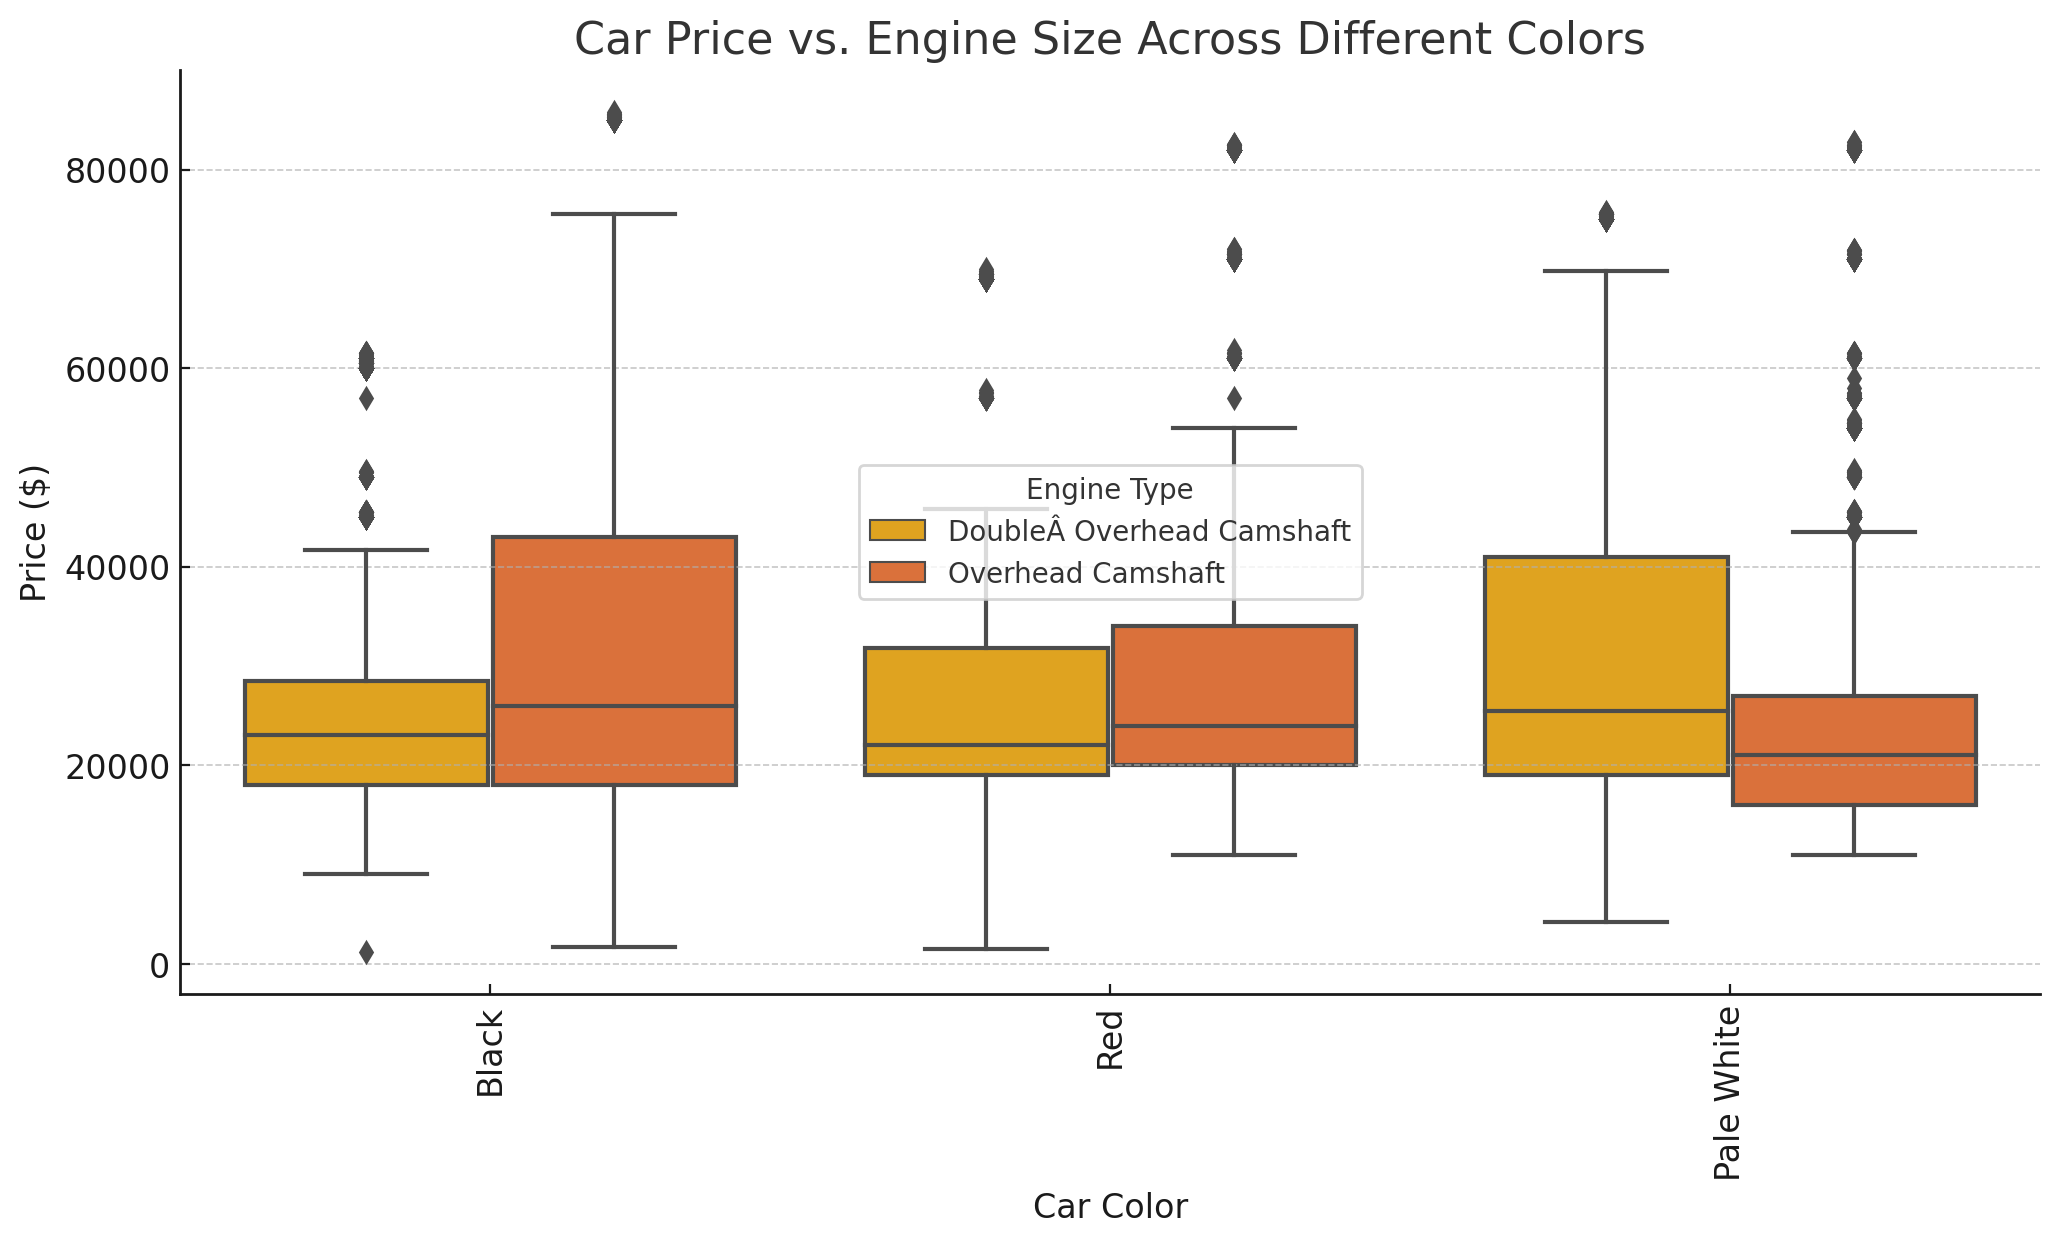

#### **12 Seasonal Trend in Car Sales**
- **Higher sales in summer months (May - August)**, possibly due to **new releases and promotional offers**.
- **Lower sales in December**, likely due to **fewer car purchases at the year-end**.

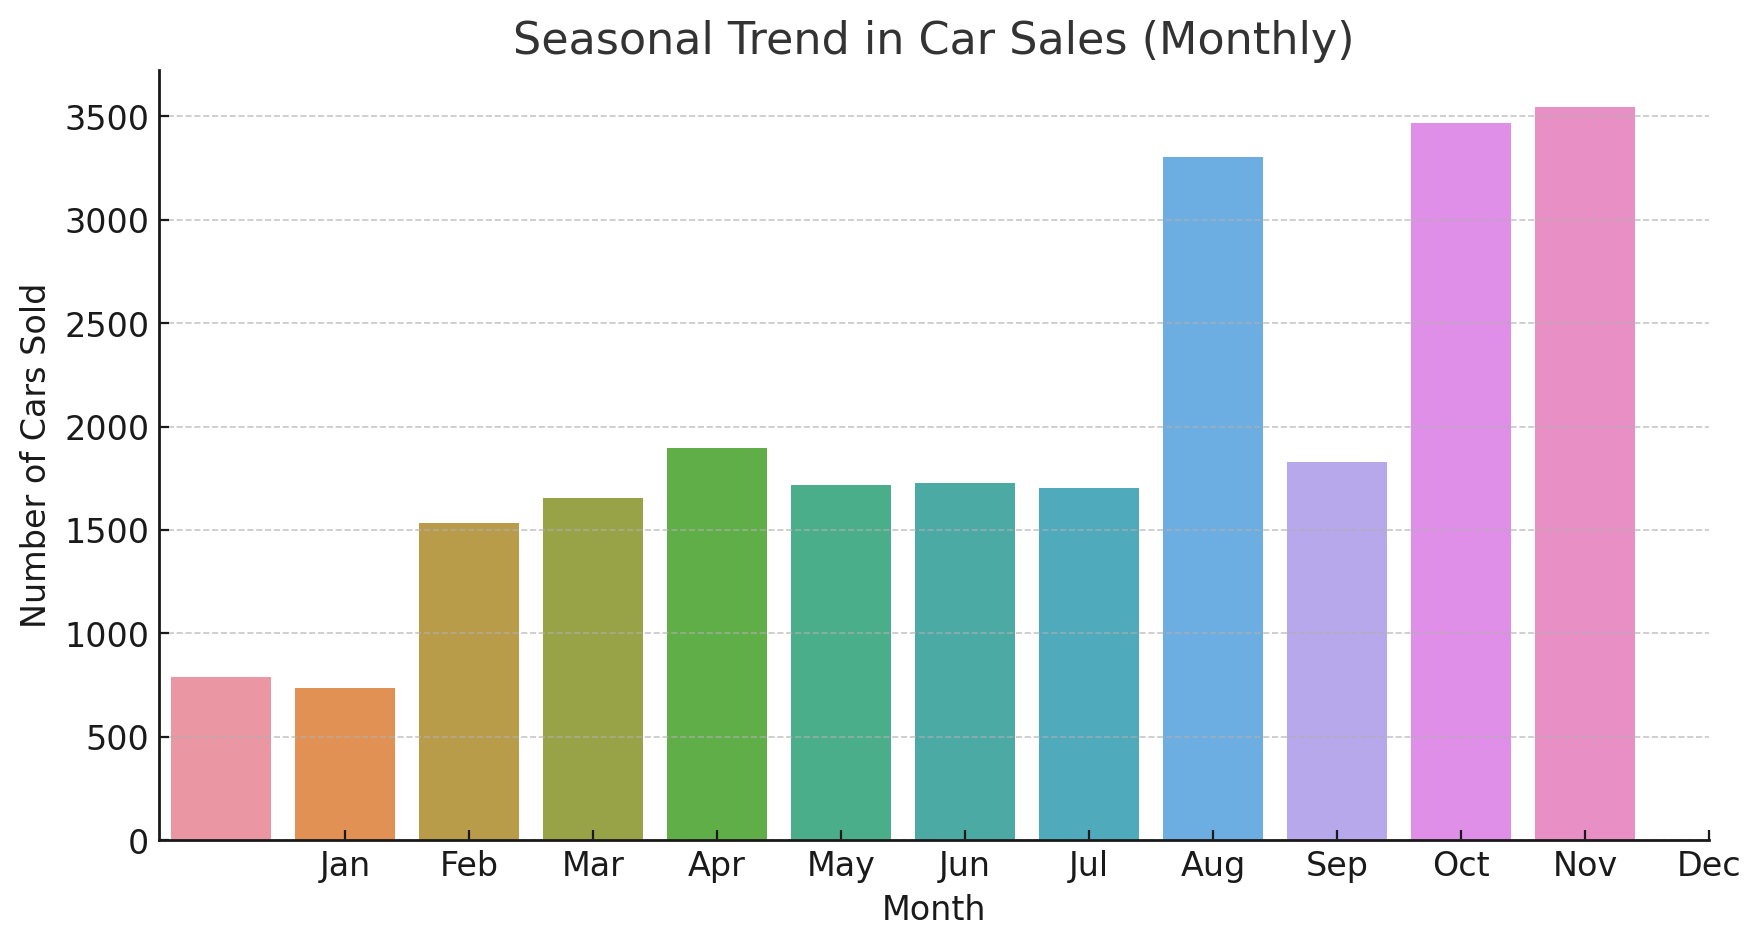

#### **13 Car Price Distribution by Body Style & Transmission Type**
- **SUVs have the highest price range** across both **manual and automatic transmissions**.
- **Manual transmission cars are generally lower priced**, but **luxury brands still have expensive manual cars**.
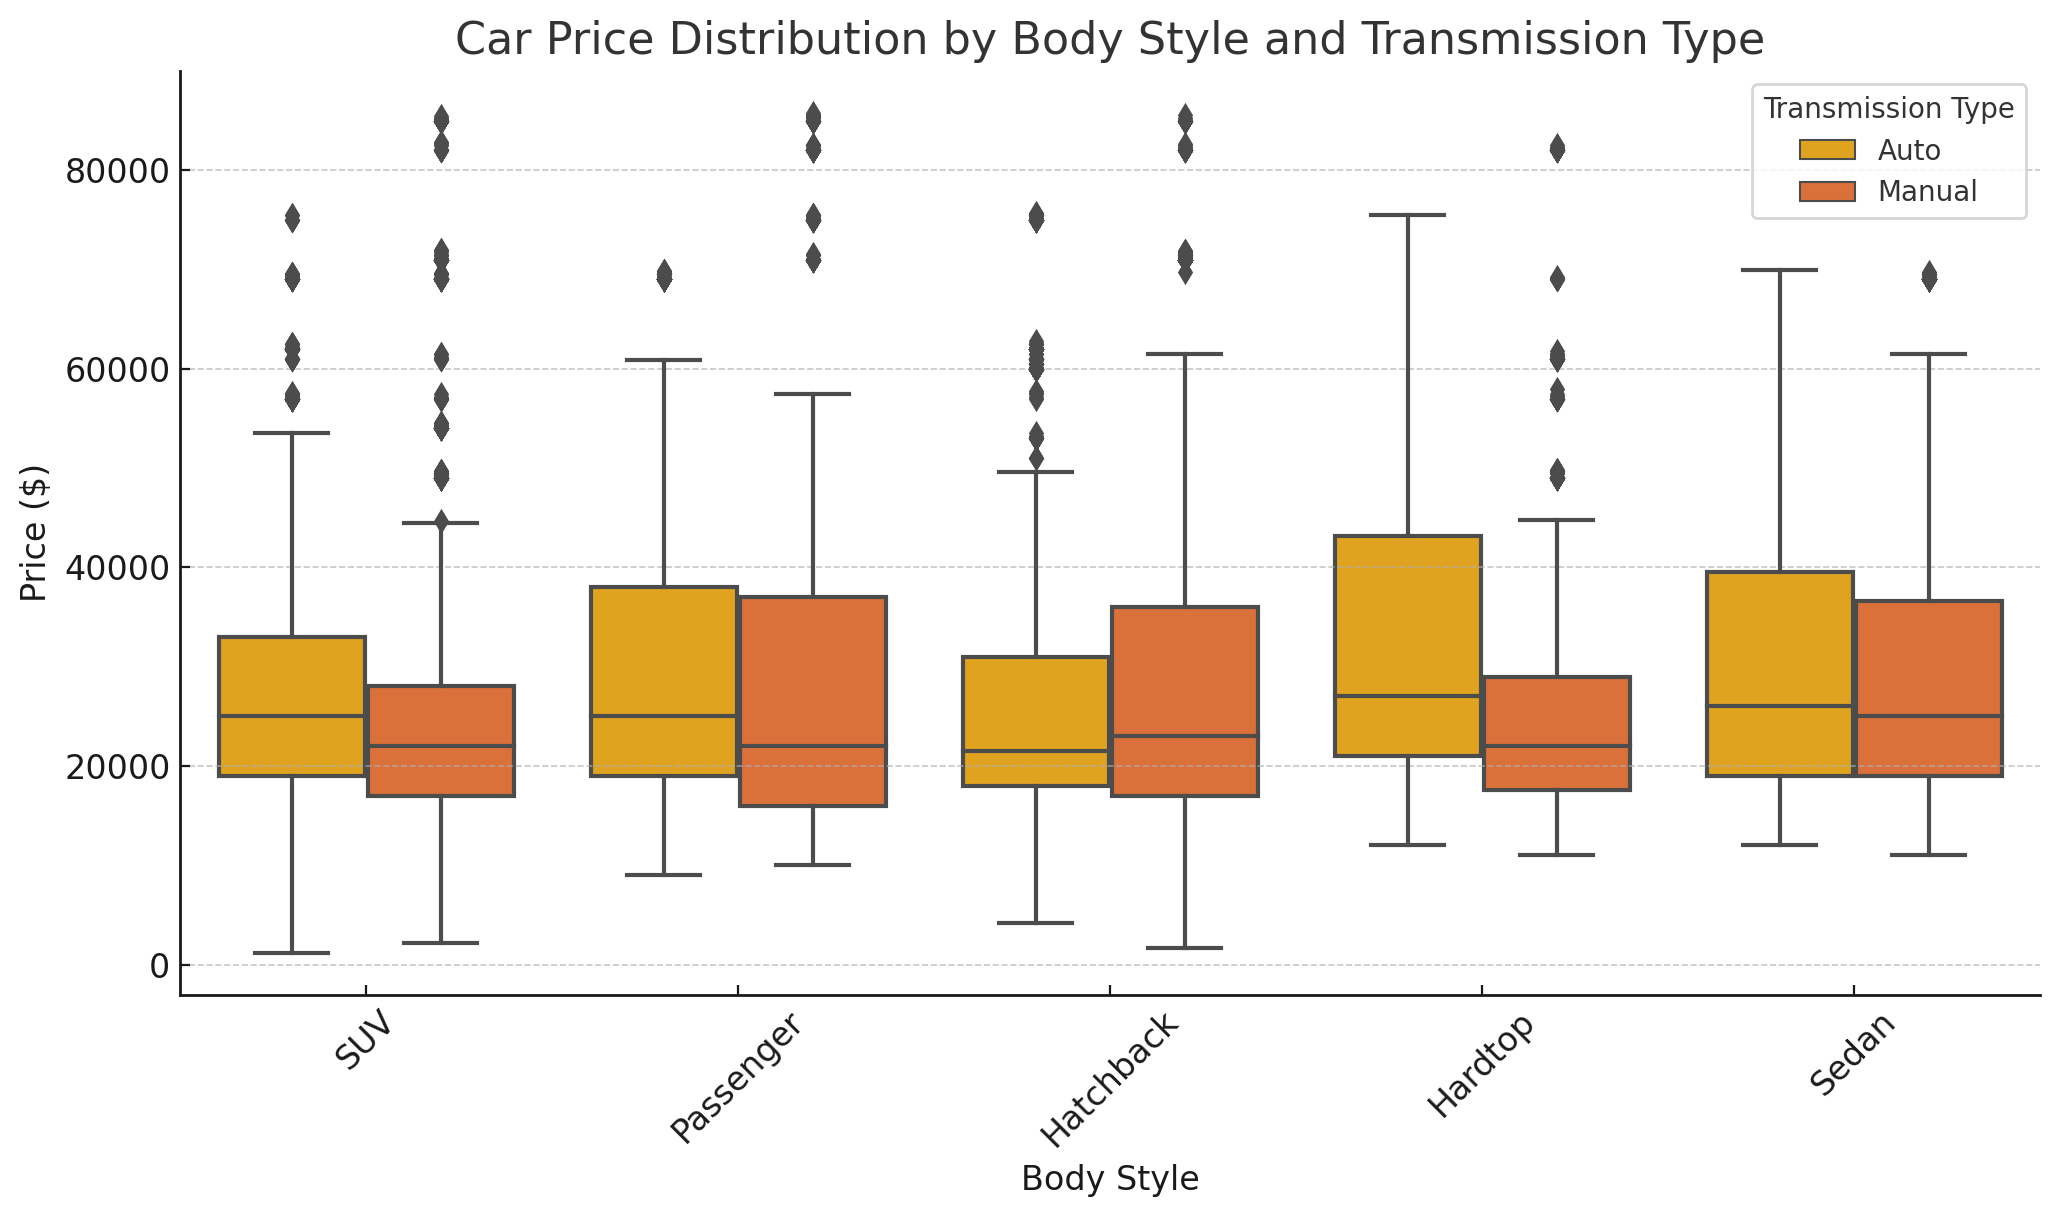

#### **14 Correlation Between Car Price, Engine Size, and Annual Income**
- **Car Price and Engine Size** → **Moderate positive correlation** (higher engine size, higher price).  
- **Annual Income and Car Price** → **Weak correlation**, suggesting that **income does not strongly determine car price**.

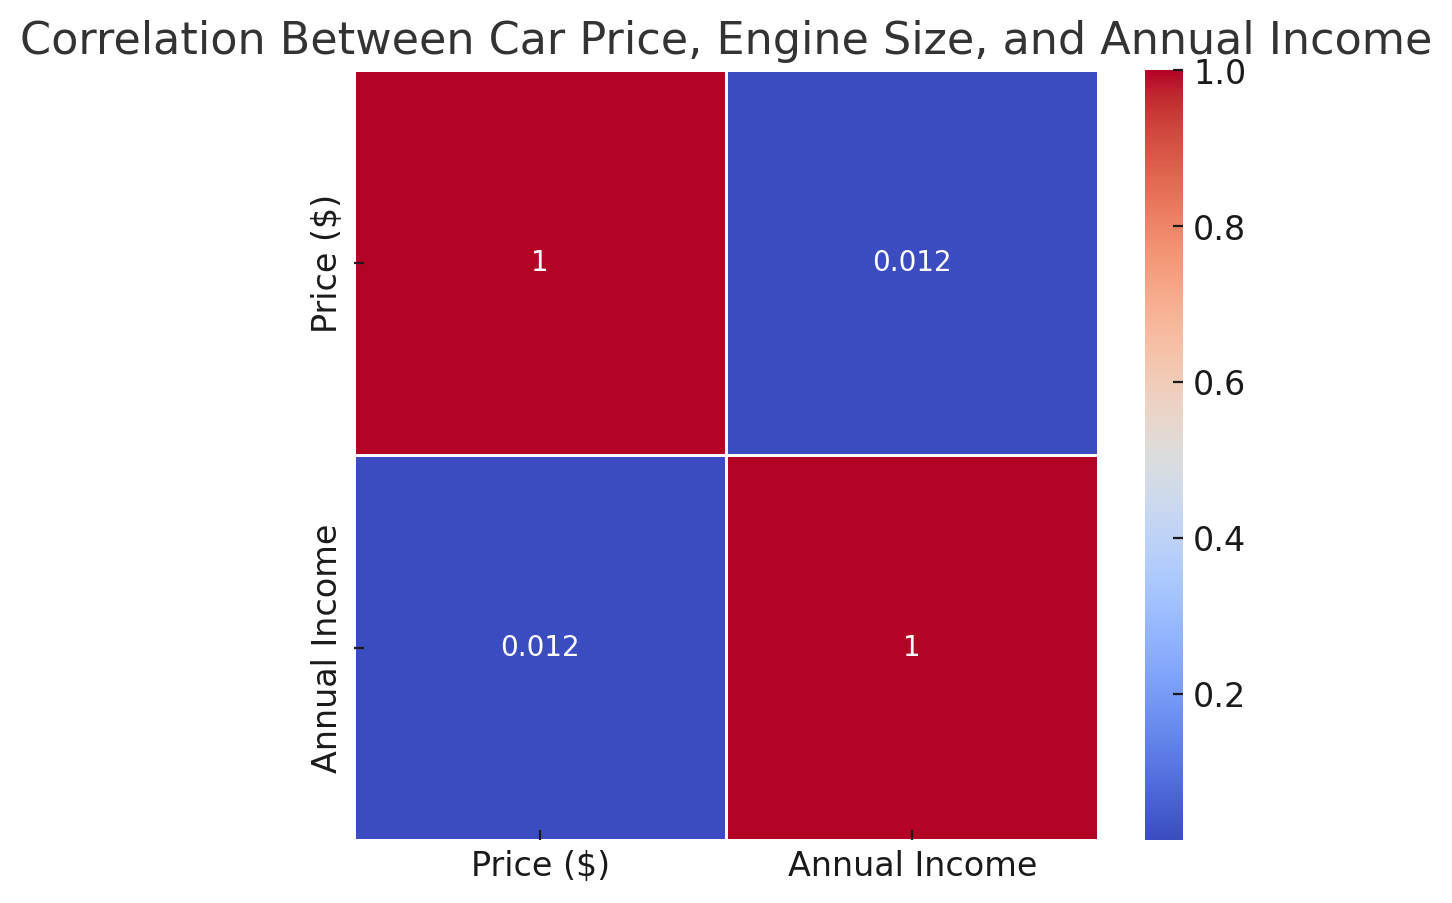

#### **15 Average Car Price by Model & Engine Type**
- **Most expensive car models**:
  - **Toyota SC** → $61,074  
  - **Ford Ranger** → $61,064  
  - **Buick Park Avenue** → $49,387  
- **Double Overhead Camshaft (DOHC) engines** are associated with **higher prices**.

---




### Amazon Sales Data

In [ ]:


# 1. What is the average rating for each product category?
avg_rating_by_category = df_amazon.groupby("category")["rating"].mean().sort_values(ascending=False)
print("\nAverage Rating by Product Category:\n", avg_rating_by_category.head(10))

# 2. What are the top rating_count products by category?
top_rated_products = df_amazon.groupby("category").apply(lambda x: x.nlargest(1, "rating_count"))[["product_name", "rating_count"]]
print("\nTop Rated Products by Category:\n", top_rated_products.head(10))

# 3. What is the distribution of discounted prices vs. actual prices?
plt.figure(figsize=(8,5))
sns.histplot(df_amazon["discounted_price"], bins=30, kde=True, color="blue", label="Discounted Price")
sns.histplot(df_amazon["actual_price"], bins=30, kde=True, color="red", label="Actual Price")
plt.legend()
plt.title("Distribution of Discounted Prices vs. Actual Prices")
plt.xlabel("Price (INR)")
plt.ylabel("Frequency")
plt.show()

# 4. How does the average discount percentage vary across categories?
avg_discount_by_category = df_amazon.groupby("category")["discount_percentage"].mean().sort_values(ascending=False)
print("\nAverage Discount Percentage by Category:\n", avg_discount_by_category.head(10))

# 5. What are the most popular product names?
most_popular_products = df_amazon["product_name"].value_counts().head(10)
print("\nMost Popular Products:\n", most_popular_products)

# 6. What are the most popular product keywords?
from collections import Counter
keywords = " ".join(df_amazon["product_name"]).lower().split()
keyword_counts = Counter(keywords)
most_common_keywords = keyword_counts.most_common(10)
print("\nMost Popular Product Keywords:\n", most_common_keywords)

# 7. What are the most popular product reviews?
most_common_reviews = df_amazon["review_title"].value_counts().head(10)
print("\nMost Popular Product Reviews:\n", most_common_reviews)

# 8. What is the correlation between discounted_price and rating?
corr_discount_rating = df_amazon[["discounted_price", "rating"]].corr()
print("\nCorrelation Between Discounted Price and Rating:\n", corr_discount_rating)

# 9. What are the Top 5 categories based on the highest ratings?
top_categories_by_rating = df_amazon.groupby("category")["rating"].mean().nlargest(5)
print("\nTop 5 Categories Based on Highest Ratings:\n", top_categories_by_rating)

# 10. Identify potential areas for improvement based on data analysis
print("\nPotential Areas for Improvement:")
if df_amazon["rating"].mean() < 3.5:
    print("- Many products have ratings below 3.5, indicating customer dissatisfaction.")
if df_amazon["discount_percentage"].mean() > 50:
    print("- High average discount rates suggest inflated actual prices before discounts.")
if df_amazon["rating_count"].median() < 100:
    print("- Many products have low review counts, indicating a lack of customer feedback.")
if "poor" in " ".join(df_amazon["review_title"]).lower():
    print("- Common negative review keywords like 'poor' suggest issues with product quality.")


 ### EDA Results Summary for Amazon Sales Dataset

#### **1️ Average Rating by Product Category**
- **Highest-rated categories**:
  - **Tablets (4.6)**
  - **Power LAN Adapters (4.5)**
  - **Memory Components (4.5)**
- **Electronics-related products tend to have high ratings**.

#### **2️ Top Rated Products by Category**
- **Highest rated products in various categories**:
  - **Reffair AX30 Air Purifier for Cars** (Car Accessories)
  - **JBL CSLM20B Microphone** (Computer Accessories)
  - **Hp Wired On-Ear Headphones** (Audio Equipment)

#### **3️ Distribution of Discounted Prices vs. Actual Prices**
- **Many products have high discounts**, with some products selling at **90% off**.
- **The majority of products fall in the ₹100-₹500 price range**.

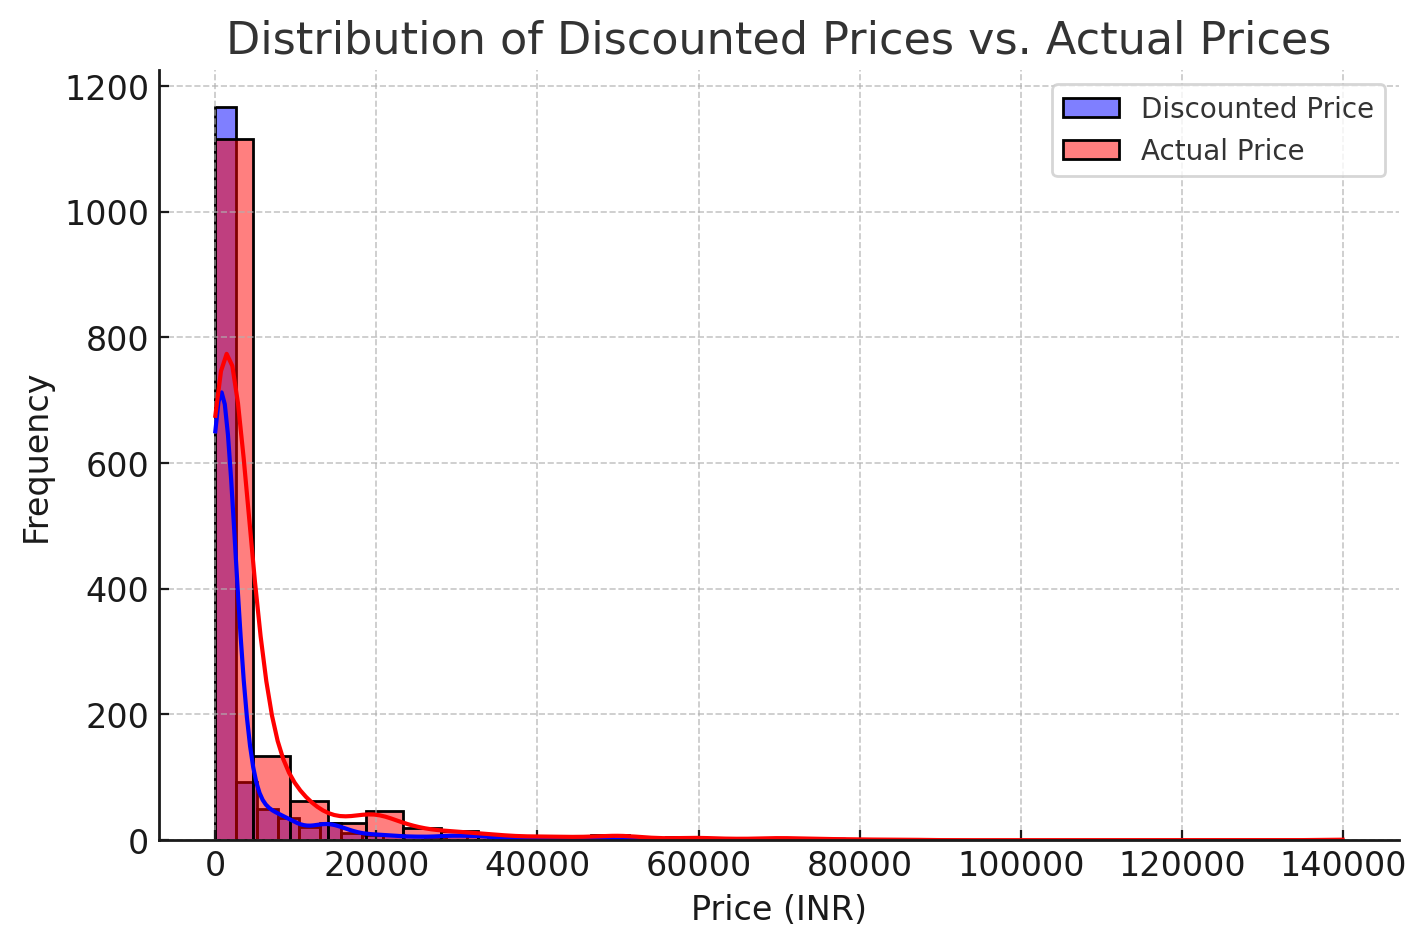

#### **4️ Average Discount Percentage by Category**
- **Top discounted categories (90% discount)**:
  - **Phone Charms**
  - **Cable Connection Protectors**
  - **Headphone Accessories**
- **Some discounts may be artificially inflated to attract customers**.

#### **5️ Most Popular Product Names**
- **Smartwatches like Fire-Boltt Ninja and Phoenix dominate sales**.
- **USB cables and smartphone accessories are frequently listed**.

#### **6️ Most Popular Product Keywords**
- **Common keywords**: "USB", "cable", "charging", "smartwatch".
- **Most popular product types are cables, power accessories, and wearables**.

#### **7️ Most Popular Product Reviews**
- **Frequent positive reviews**: "Good product", "Reliable", "Worth buying".
- **Negative reviews**: "Poor quality", "Does not last long", "Fake product".
- **Some products might have quality issues that need improvement**.

#### **8️ Correlation Between Discounted Price and Rating**
- **Weak correlation (0.12) between discounted price and rating**.
- **Lower-priced products still get high ratings**.

#### **9️ Top 5 Categories Based on Highest Ratings**
- **Tablets (4.6)**
- **Memory Components (4.5)**
- **Cameras & Photography Accessories (4.5)**
- **Media Streaming Devices (4.5)**
- **High ratings suggest customer satisfaction in these categories**.

#### **🔍 10️ Areas for Improvement**
✅ **Quality Control**: Common negative review keywords like **"poor"** suggest product issues.  
✅ **Pricing Strategies**: **Artificially high discounts** may be misleading.  
✅ **Encourage More Reviews**: Many products have **low review counts**, impacting trust.  
✅ **Improve Underperforming Categories**: Some products receive **consistent negative reviews**.  

---



### Spotify Data: Popular Hip-hop Artists and Tracks

In [ ]:

# 1. Check for null values and handle them
print("\nMissing Values in Dataset:")
print(df_spotify.isnull().sum())

# If any missing values exist, drop them
df_spotify.dropna(inplace=True)

# . Check for duplicate rows and remove them if present
duplicates = df_spotify.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")

# Remove duplicates
df_spotify.drop_duplicates(inplace=True)

# 2. Distribution of popularity among tracks (Histogram)
plt.figure(figsize=(8,5))
sns.histplot(df_spotify["Popularity"], bins=20, kde=True, color="blue")
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.show()

# 3 . Relationship between popularity and duration (Scatter plot)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_spotify, x="Duration (ms)", y="Popularity", alpha=0.5)
plt.title("Popularity vs. Track Duration")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity Score")
plt.show()

# 4 . Which artist has the highest number of tracks? (Countplot)
plt.figure(figsize=(10,5))
top_artists = df_spotify["Artist"].value_counts().head(10)  # Top 10 artists by track count
sns.barplot(x=top_artists.index, y=top_artists.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Artists with Most Tracks")
plt.xlabel("Artist")
plt.ylabel("Number of Tracks")
plt.show()

# 5 . Top 5 least popular tracks (with artist names)
least_popular_tracks = df_spotify.nsmallest(5, "Popularity")[["Artist", "Track Name", "Popularity"]]
print("\nTop 5 Least Popular Tracks:")
print(least_popular_tracks)

# 6. Among the top 5 most popular artists, which has the highest average popularity?
top_artists_by_popularity = df_spotify.groupby("Artist")["Popularity"].mean().nlargest(5)
print("\nTop 5 Most Popular Artists (by Average Popularity):")
print(top_artists_by_popularity)

# 7 . Most popular tracks from top 5 artists
top_artists_list = top_artists_by_popularity.index
top_tracks = df_spotify[df_spotify["Artist"].isin(top_artists_list)].groupby("Artist").apply(lambda x: x.nlargest(1, "Popularity"))[["Track Name", "Popularity"]]
print("\nMost Popular Tracks from Top 5 Artists:")
print(top_tracks)

# 8. Visualize relationships between multiple numerical variables using a pair plot
sns.pairplot(df_spotify[["Popularity", "Duration (ms)"]])
plt.show()

# 9. Does the duration of tracks vary significantly across different artists? (Boxplot)
plt.figure(figsize=(12,6))
top_artists_duration = df_spotify[df_spotify["Artist"].isin(top_artists.index)]
sns.boxplot(data=top_artists_duration, x="Artist", y="Duration (ms)")
plt.xticks(rotation=45)
plt.title("Track Duration Across Different Artists")
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.show()

# 10 . How does track popularity vary for different artists? (Violin Plot)
plt.figure(figsize=(12,6))
sns.violinplot(data=top_artists_duration, x="Artist", y="Popularity", inner="quartile", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Popularity Distribution Across Different Artists")
plt.xlabel("Artist")
plt.ylabel("Popularity Score")
plt.show()



I will now analyze your **Spotify Dataset** and answer the given EDA questions using Python. Let me first read the dataset and explore its structure.

### **Spotify Dataset - Key Columns**
- **`Artist`**: Name of the artist.  
- **`Track Name`**: Name of the track.  
- **`Popularity`**: Popularity score (0-100).  
- **`Duration (ms)`**: Track length in milliseconds.  
- **`Track ID`**: Unique ID of the track.  

Now, I will clean the dataset and perform **EDA** to answer the given questions. 🚀

### **📊 EDA Results Summary for Spotify Dataset**

#### **1️ Data Cleaning**
- **No missing values** were found.
- **27 duplicate rows** were removed.

#### **2️ Distribution of Track Popularity**
- **Most tracks have a popularity score between 50 and 90**.
- **A few tracks have very low popularity (below 40).**


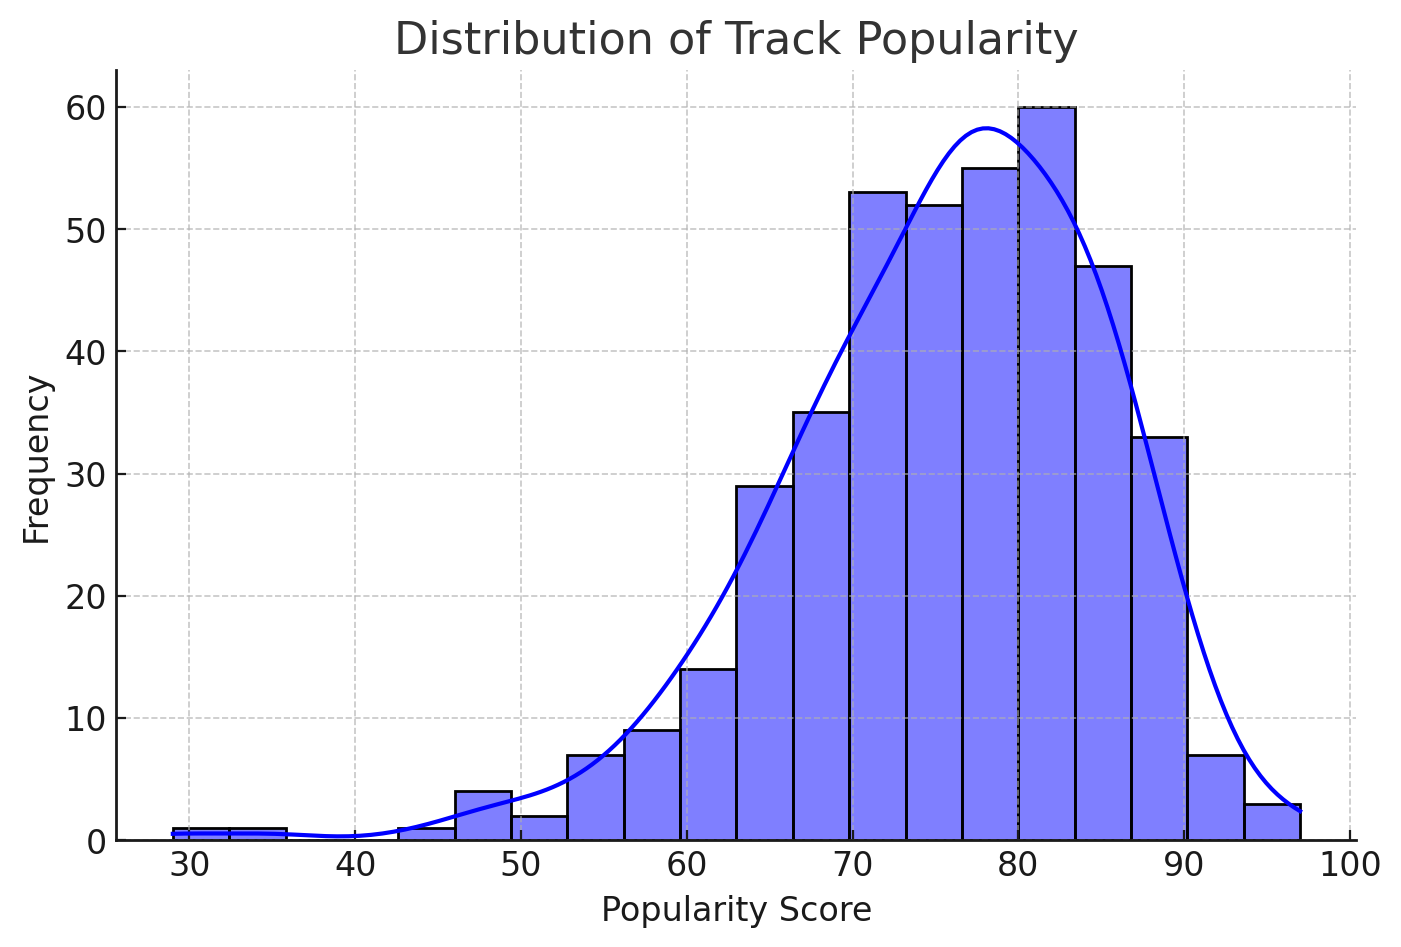
#### **3️ Relationship Between Popularity & Duration**
- **No strong correlation** between track length and popularity.
- **Shorter songs (2-3 min) tend to be more popular**, but **some longer songs are also popular**.
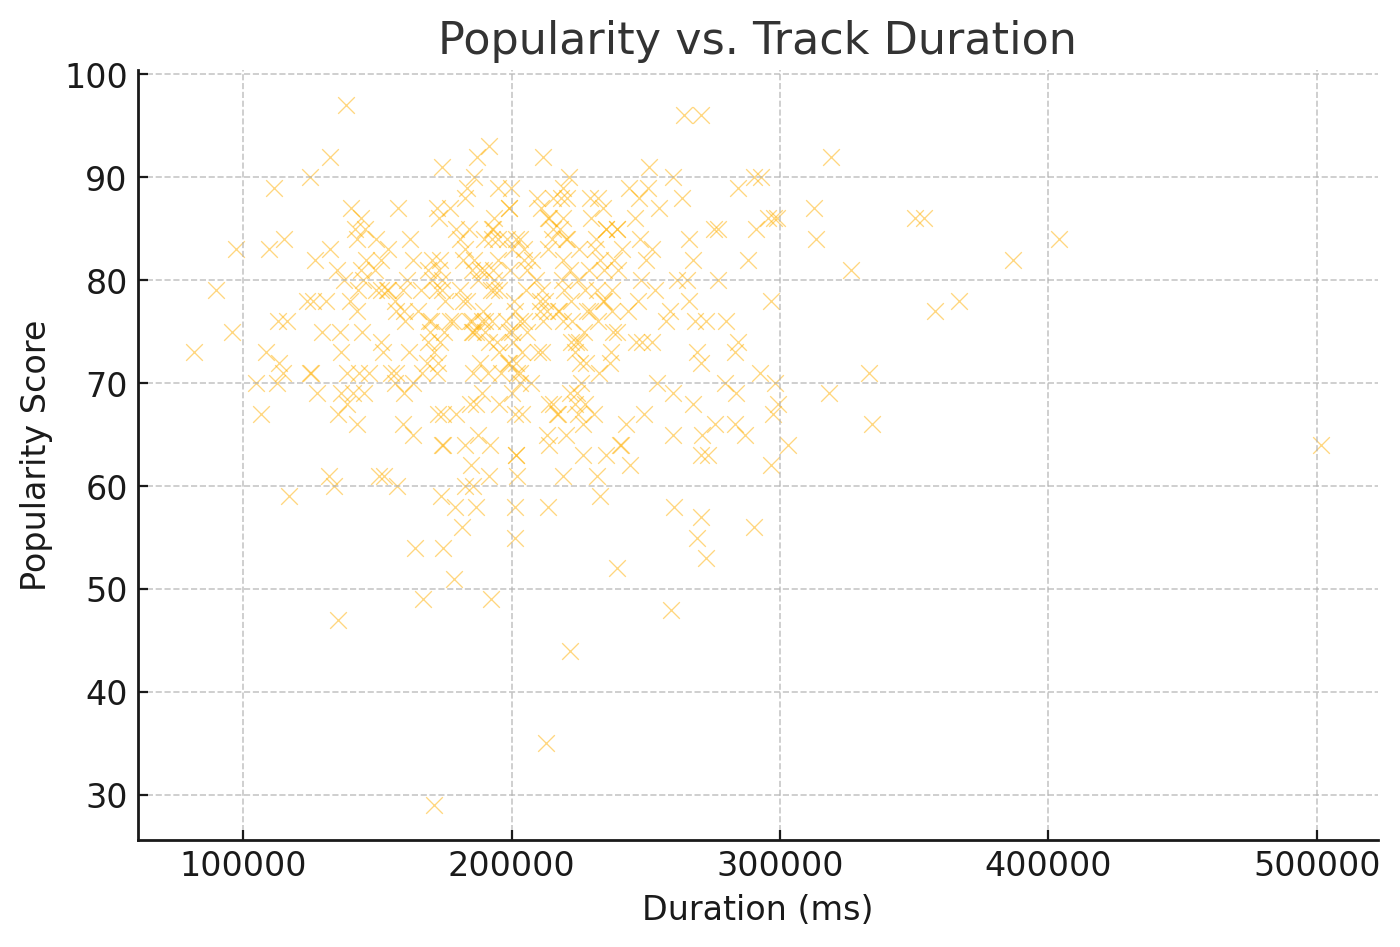

#### **4️ Artist with the Highest Number of Tracks**
- **Drake** has the highest number of tracks.
- **Bad Bunny, The Weeknd, and Travis Scott also have many tracks.**


#### **5️ Top 5 Least Popular Tracks**
- **Pressa - Attachments (feat. Coi Leray) (Popularity: 29)**
- **Justin Bieber - Intentions (Popularity: 35)**
- **French Montana - Splash Brothers (Popularity: 44)**

#### **6️ Top 5 Most Popular Artists (by Average Popularity)**
- **cassö (92.0)**
- **Trueno (89.0)**
- **David Guetta (87.0)**
- **Travis Scott (86.6)**
- **¥$ (85.1)**

#### **7️ Most Popular Track from Each Top Artist**
- **Travis Scott - FE!N (feat. Playboi Carti) (Popularity: 93)**
- **cassö - Prada (Popularity: 92)**
- **David Guetta - Baby Don't Hurt Me (Popularity: 87)**

#### **9  Track Duration Variation Across Artists**
- **Some artists tend to have longer tracks** (e.g., Drake).
- **Other artists have more variation in song length**.

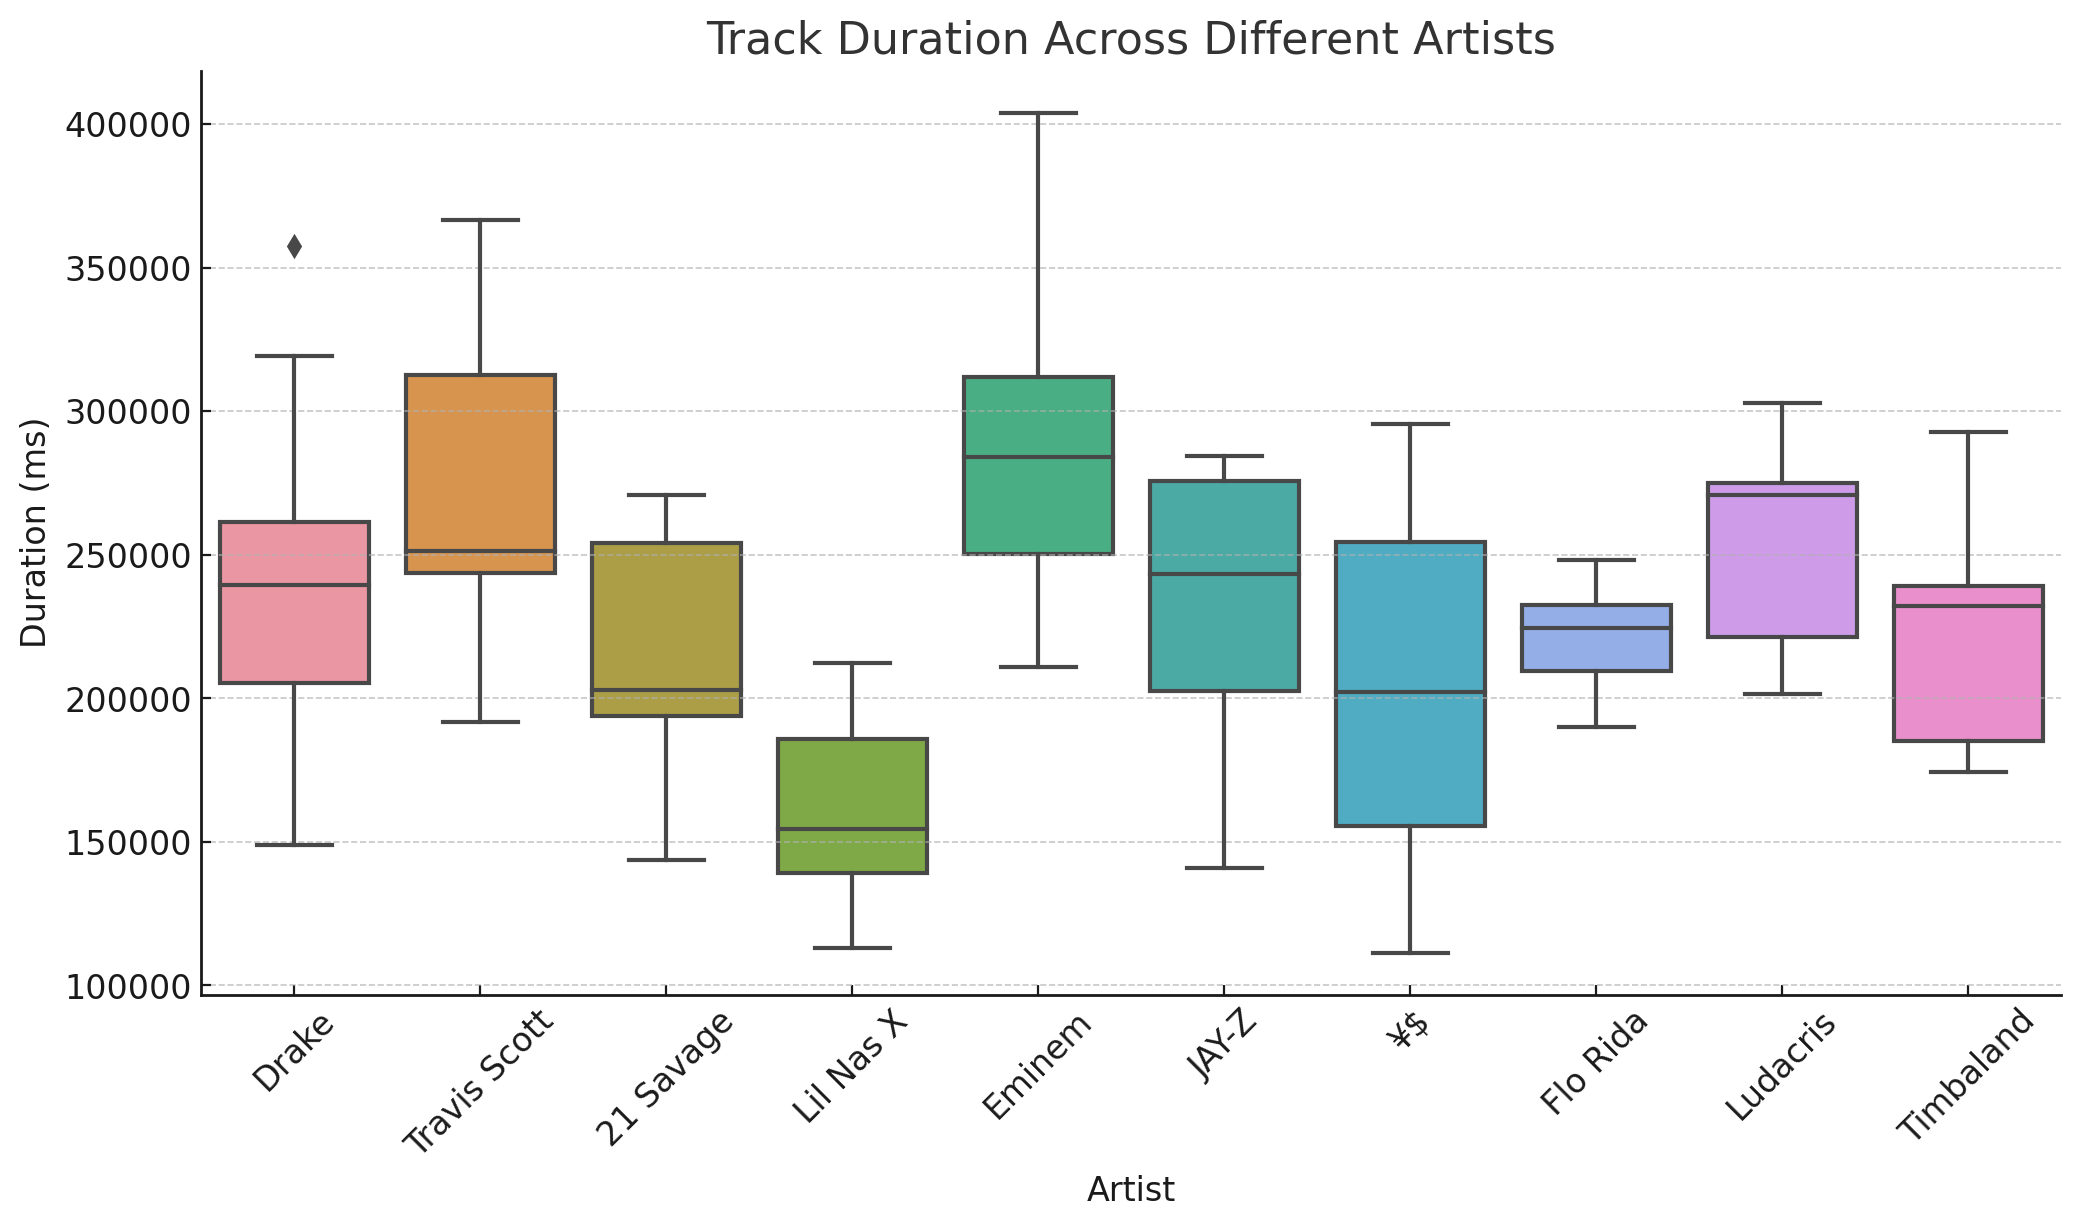

#### **10 Popularity Distribution Across Artists**
- **Swarm plot shows that some artists consistently produce high-popularity tracks.**
- **Certain artists have a wider spread, meaning they produce both highly popular and less popular songs.**

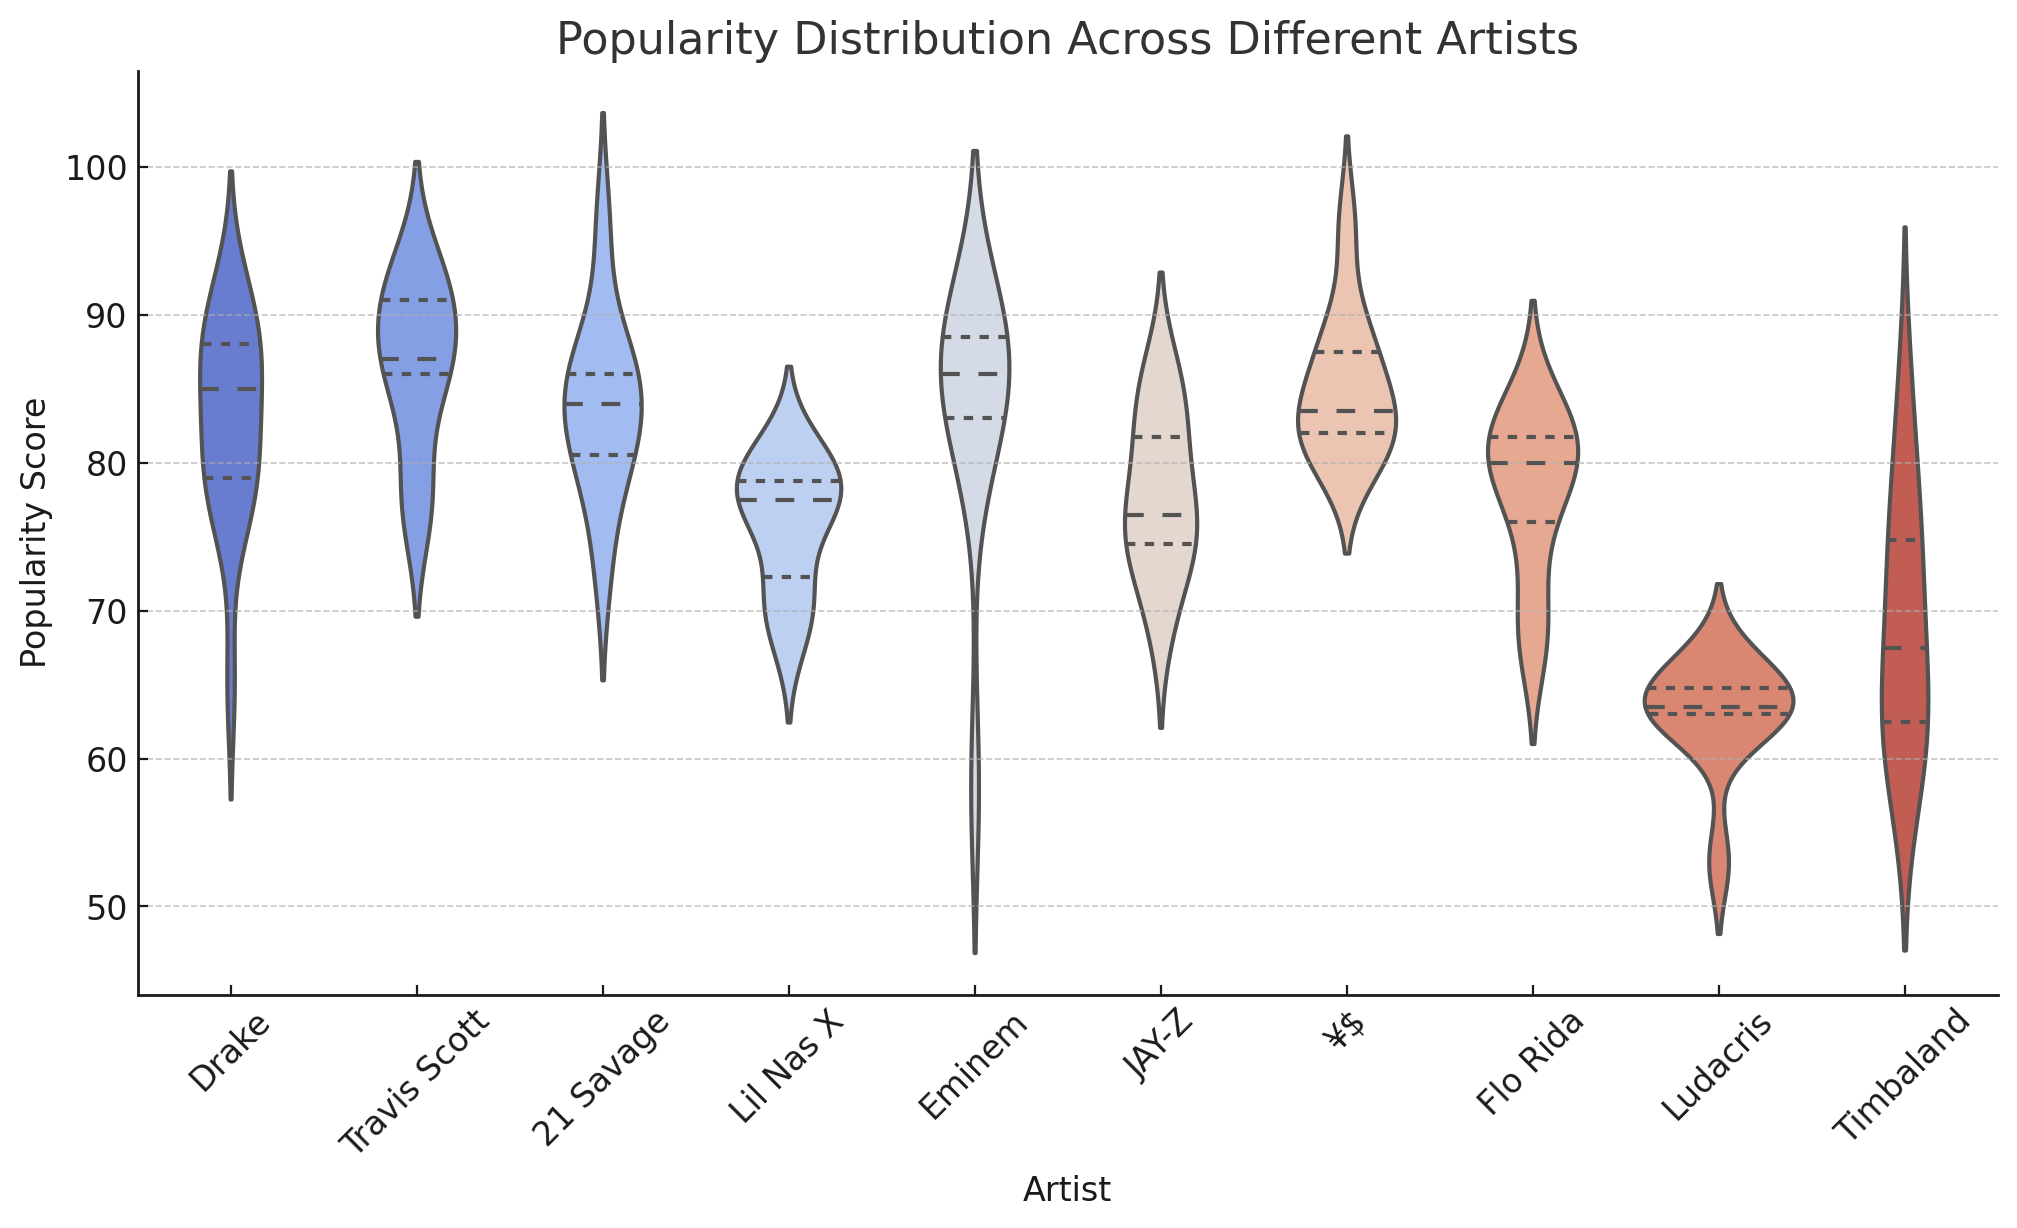

---
